# Report about Coind 19 around the world 2020-2019

in the next report, we will try to explain the covid-19 evolution around the world, impact in continents, countries and try to make a prediction about how it will continue.

The dataset come from OMS and is composed:

* dateRep
* day
* month
* year
* cases
* deaths
* countriesAndTerritories
* geoId
* countryterritoryCode
* popData2019
* continentExp
* Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 = 14_days_1000

# 1. import Libraries

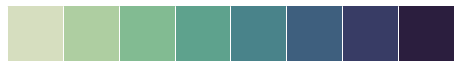

In [169]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

#normalize variable.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Pipeline= pipeline
from sklearn.pipeline import Pipeline
#Pipeline = columntrasformer
from sklearn.compose import ColumnTransformer

#Clusters
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

#kneed, to identify the elbow point programmatically
from kneed import KneeLocator

#Evauleting model.
from sklearn.metrics import adjusted_rand_score # adjusted rand index (ARI)
from sklearn.metrics import silhouette_score

#PCA
from sklearn.decomposition import PCA

#selection model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#standard scaler
from sklearn.preprocessing import StandardScaler

#Hyperparameter tunning with lazypredict
## pip install lazypredict
from lazypredict.Supervised import LazyRegressor, LazyClassifier

#Distribution
from fitter import Fitter, get_common_distributions

#LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor

#Lineal Regression metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#PLLETE
sns.palplot(sns.cubehelix_palette(8,start=.5,rot=-.75))
plt.style.use("seaborn")

import warnings
warnings.filterwarnings('ignore')
dire ='D:\\IT_Academics\\Data_Science\\Datasets\\covid\\'

# 1. Import Dataset 

In [2]:
data = pd.read_csv(dire +'data.csv')

In [3]:
data

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      14/12/2020   14     12  2020    746       6             Afghanistan   
1      13/12/2020   13     12  2020    298       9             Afghanistan   
2      12/12/2020   12     12  2020    113      11             Afghanistan   
3      11/12/2020   11     12  2020     63      10             Afghanistan   
4      10/12/2020   10     12  2020    202      16             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
61895  25/03/2020   25      3  2020      0       0                Zimbabwe   
61896  24/03/2020   24      3  2020      0       1                Zimbabwe   
61897  23/03/2020   23      3  2020      0       0                Zimbabwe   
61898  22/03/2020   22      3  2020      1       0                Zimbabwe   
61899  21/03/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  \
0        AF                  AFG  38041757.00         Asia   
1        AF                  AFG  38041757.00         Asia   
2        AF                  AFG  38041757.00         Asia   
3        AF                  AFG  38041757.00         Asia   
4        AF                  AFG  38041757.00         Asia   
...     ...                  ...          ...          ...   
61895    ZW                  ZWE  14645473.00       Africa   
61896    ZW                  ZWE  14645473.00       Africa   
61897    ZW                  ZWE  14645473.00       Africa   
61898    ZW                  ZWE  14645473.00       Africa   
61899    ZW                  ZWE  14645473.00       Africa   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                                   9.01           
1                                                   7.05           
2                                                   6.87           
3                                                   7.13           
4                                                   6.97           
...                                                  ...           
61895                                                nan           
61896                                                nan           
61897                                                nan           
61898                                                nan           
61899                                                nan           

[61900 rows x 12 columns]

# 3. Exploring Data

In [4]:
data = data.rename(columns={'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'14_days_1000'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  61900 non-null  object 
 1   day                      61900 non-null  int64  
 2   month                    61900 non-null  int64  
 3   year                     61900 non-null  int64  
 4   cases                    61900 non-null  int64  
 5   deaths                   61900 non-null  int64  
 6   countriesAndTerritories  61900 non-null  object 
 7   geoId                    61625 non-null  object 
 8   countryterritoryCode     61777 non-null  object 
 9   popData2019              61777 non-null  float64
 10  continentExp             61900 non-null  object 
 11  14_days_1000             59021 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 5.7+ MB


In [6]:
Mynuls = data[data['geoId'].isna()]
Mynuls1 = data[data['countryterritoryCode'].isna()]
Mynuls2 = data[data['popData2019'].isna()]
Mynuls3 = data[data['14_days_1000'].isna()]

#dolars_nuls = txn[txn['Amount_dolars'].isna()].sort_values(by='Date', ascending = False)

In [7]:
# in this case we can fix the problem. change de geoid de NaN to Nam and so we can get this data for next. 
Mynuls

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
39566  14/12/2020   14     12  2020    267       0                 Namibia   
39567  13/12/2020   13     12  2020    172       0                 Namibia   
39568  12/12/2020   12     12  2020    324       2                 Namibia   
39569  11/12/2020   11     12  2020    301       3                 Namibia   
39570  10/12/2020   10     12  2020    174       2                 Namibia   
...           ...  ...    ...   ...    ...     ...                     ...   
39836  19/03/2020   19      3  2020      0       0                 Namibia   
39837  18/03/2020   18      3  2020      0       0                 Namibia   
39838  17/03/2020   17      3  2020      0       0                 Namibia   
39839  16/03/2020   16      3  2020      0       0                 Namibia   
39840  15/03/2020   15      3  2020      2       0                 Namibia   

      geoId countryterritoryCode  popData2019 continentExp  14_days_1000  
39566   NaN                  NAM   2494524.00       Africa         87.83  
39567   NaN                  NAM   2494524.00       Africa         79.53  
39568   NaN                  NAM   2494524.00       Africa         75.77  
39569   NaN                  NAM   2494524.00       Africa         64.86  
39570   NaN                  NAM   2494524.00       Africa         58.77  
...     ...                  ...          ...          ...           ...  
39836   NaN                  NAM   2494524.00       Africa           nan  
39837   NaN                  NAM   2494524.00       Africa           nan  
39838   NaN                  NAM   2494524.00       Africa           nan  
39839   NaN                  NAM   2494524.00       Africa           nan  
39840   NaN                  NAM   2494524.00       Africa           nan  

[275 rows x 12 columns]

In [8]:
Mynuls1

dateRep  day  month  year  cases  deaths  \
10935  10/03/2020   10      3  2020     -9       1   
10936  02/03/2020    2      3  2020      0       0   
10937  01/03/2020    1      3  2020      0       0   
10938  29/02/2020   29      2  2020      0       2   
10939  28/02/2020   28      2  2020      0       0   
...           ...  ...    ...   ...    ...     ...   
60873  21/10/2020   21     10  2020      0       0   
60874  20/10/2020   20     10  2020      0       0   
60875  19/10/2020   19     10  2020      0       0   
60876  18/10/2020   18     10  2020      0       0   
60877  17/10/2020   17     10  2020      1       0   

                          countriesAndTerritories     geoId  \
10935  Cases_on_an_international_conveyance_Japan  JPG11668   
10936  Cases_on_an_international_conveyance_Japan  JPG11668   
10937  Cases_on_an_international_conveyance_Japan  JPG11668   
10938  Cases_on_an_international_conveyance_Japan  JPG11668   
10939  Cases_on_an_international_conveyance_Japan  JPG11668   
...                                           ...       ...   
60873                           Wallis_and_Futuna        WF   
60874                           Wallis_and_Futuna        WF   
60875                           Wallis_and_Futuna        WF   
60876                           Wallis_and_Futuna        WF   
60877                           Wallis_and_Futuna        WF   

      countryterritoryCode  popData2019 continentExp  14_days_1000  
10935                  NaN          nan        Other           nan  
10936                  NaN          nan        Other           nan  
10937                  NaN          nan        Other           nan  
10938                  NaN          nan        Other           nan  
10939                  NaN          nan        Other           nan  
...                    ...          ...          ...           ...  
60873                  NaN          nan      Oceania           nan  
60874                  NaN          nan      Oceania           nan  
60875                  NaN          nan      Oceania           nan  
60876                  NaN          nan      Oceania           nan  
60877                  NaN          nan      Oceania           nan  

[123 rows x 12 columns]

In [9]:
Mynuls2

dateRep  day  month  year  cases  deaths  \
10935  10/03/2020   10      3  2020     -9       1   
10936  02/03/2020    2      3  2020      0       0   
10937  01/03/2020    1      3  2020      0       0   
10938  29/02/2020   29      2  2020      0       2   
10939  28/02/2020   28      2  2020      0       0   
...           ...  ...    ...   ...    ...     ...   
60873  21/10/2020   21     10  2020      0       0   
60874  20/10/2020   20     10  2020      0       0   
60875  19/10/2020   19     10  2020      0       0   
60876  18/10/2020   18     10  2020      0       0   
60877  17/10/2020   17     10  2020      1       0   

                          countriesAndTerritories     geoId  \
10935  Cases_on_an_international_conveyance_Japan  JPG11668   
10936  Cases_on_an_international_conveyance_Japan  JPG11668   
10937  Cases_on_an_international_conveyance_Japan  JPG11668   
10938  Cases_on_an_international_conveyance_Japan  JPG11668   
10939  Cases_on_an_international_conveyance_Japan  JPG11668   
...                                           ...       ...   
60873                           Wallis_and_Futuna        WF   
60874                           Wallis_and_Futuna        WF   
60875                           Wallis_and_Futuna        WF   
60876                           Wallis_and_Futuna        WF   
60877                           Wallis_and_Futuna        WF   

      countryterritoryCode  popData2019 continentExp  14_days_1000  
10935                  NaN          nan        Other           nan  
10936                  NaN          nan        Other           nan  
10937                  NaN          nan        Other           nan  
10938                  NaN          nan        Other           nan  
10939                  NaN          nan        Other           nan  
...                    ...          ...          ...           ...  
60873                  NaN          nan      Oceania           nan  
60874                  NaN          nan      Oceania           nan  
60875                  NaN          nan      Oceania           nan  
60876                  NaN          nan      Oceania           nan  
60877                  NaN          nan      Oceania           nan  

[123 rows x 12 columns]

In this case we can apply a roule to fix. Finally we have made the decission to change NAN per 0. It's possible they don't data but it's warth to keep the lines


In [10]:
Mynuls3

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
327    12/01/2020   12      1  2020      0       0             Afghanistan   
328    11/01/2020   11      1  2020      0       0             Afghanistan   
329    10/01/2020   10      1  2020      0       0             Afghanistan   
330    09/01/2020    9      1  2020      0       0             Afghanistan   
331    08/01/2020    8      1  2020      0       0             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
61895  25/03/2020   25      3  2020      0       0                Zimbabwe   
61896  24/03/2020   24      3  2020      0       1                Zimbabwe   
61897  23/03/2020   23      3  2020      0       0                Zimbabwe   
61898  22/03/2020   22      3  2020      1       0                Zimbabwe   
61899  21/03/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  14_days_1000  
327      AF                  AFG  38041757.00         Asia           nan  
328      AF                  AFG  38041757.00         Asia           nan  
329      AF                  AFG  38041757.00         Asia           nan  
330      AF                  AFG  38041757.00         Asia           nan  
331      AF                  AFG  38041757.00         Asia           nan  
...     ...                  ...          ...          ...           ...  
61895    ZW                  ZWE  14645473.00       Africa           nan  
61896    ZW                  ZWE  14645473.00       Africa           nan  
61897    ZW                  ZWE  14645473.00       Africa           nan  
61898    ZW                  ZWE  14645473.00       Africa           nan  
61899    ZW                  ZWE  14645473.00       Africa           nan  

[2879 rows x 12 columns]

Solved Mynuls3.

In [11]:
data['14_days_1000'] = data['14_days_1000'].replace(np.nan, 0) 

Solved Mynuls1

In [12]:
data['geoId'] = data['geoId'].replace(np.nan, 'NAM') 

Mynuls2 we can delete

In [13]:
data = data. dropna()

In [14]:
data.isnull().sum()


dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
geoId                      0
countryterritoryCode       0
popData2019                0
continentExp               0
14_days_1000               0
dtype: int64

In [15]:
#Change de datarep to time
data.dateRep= pd.to_datetime(data['dateRep'])

In [16]:
#Change popData2019  to categorical
#data['popData2019_Str'] = data['popData2019'].round(0).astype(str)

In [17]:
data.describe()

day    month     year     cases   deaths   popData2019  \
count 61777.00 61777.00 61777.00  61777.00 61777.00      61777.00   
mean     15.63     7.07  2020.00   1157.44    26.11   40987698.23   
std       8.84     2.95     0.03   6785.78   131.35  153129379.34   
min       1.00     1.00  2019.00  -8261.00 -1918.00        815.00   
25%       8.00     5.00  2020.00      0.00     0.00    1293120.00   
50%      15.00     7.00  2020.00     16.00     0.00    7169456.00   
75%      23.00    10.00  2020.00    276.00     4.00   28515829.00   
max      31.00    12.00  2020.00 234633.00  4928.00 1433783692.00   

       14_days_1000  
count      61777.00  
mean          63.36  
std          159.26  
min         -147.42  
25%            0.43  
50%            5.78  
75%           47.06  
max         1900.84

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61777 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  61777 non-null  datetime64[ns]
 1   day                      61777 non-null  int64         
 2   month                    61777 non-null  int64         
 3   year                     61777 non-null  int64         
 4   cases                    61777 non-null  int64         
 5   deaths                   61777 non-null  int64         
 6   countriesAndTerritories  61777 non-null  object        
 7   geoId                    61777 non-null  object        
 8   countryterritoryCode     61777 non-null  object        
 9   popData2019              61777 non-null  float64       
 10  continentExp             61777 non-null  object        
 11  14_days_1000             61777 non-null  float64       
dtypes: datetime64[ns](1), float64(2)

## 4. Analysis

array([[<AxesSubplot:title={'center':'14_days_1000'}>,
        <AxesSubplot:title={'center':'cases'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'deaths'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'popData2019'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

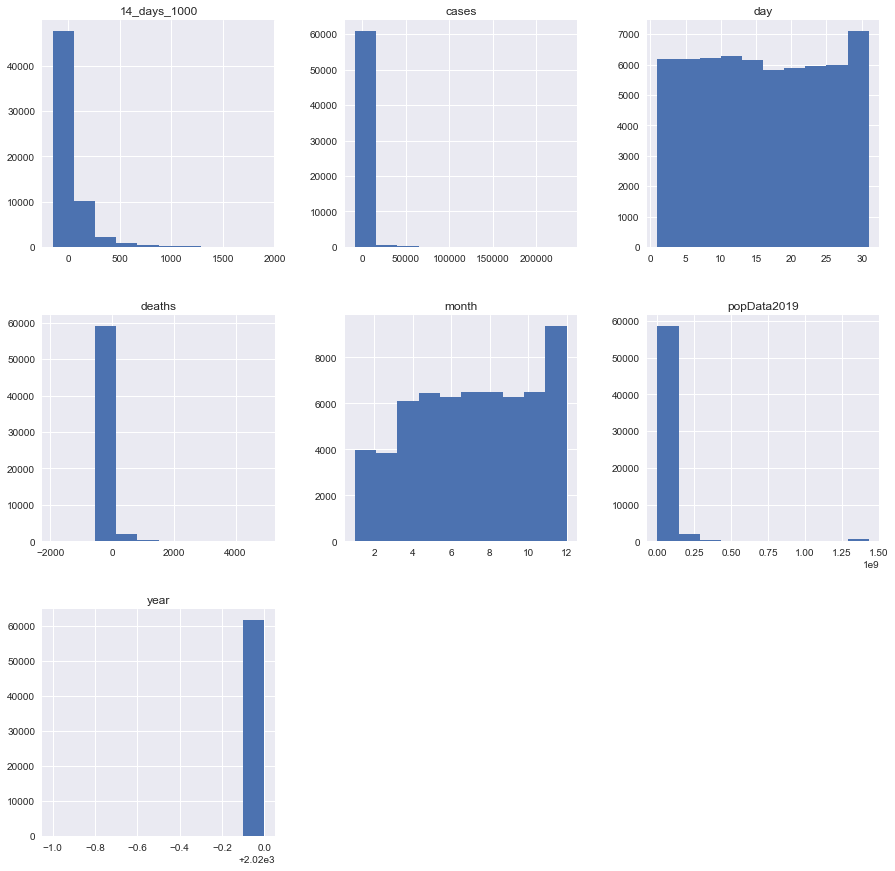

In [19]:
#numeric data
data.hist(figsize=(15,15))

In [20]:
#sns.pairplot(data)

In [21]:
data.select_dtypes(['object']).count()

countriesAndTerritories    61777
geoId                      61777
countryterritoryCode       61777
continentExp               61777
dtype: int64

In [22]:
data['continentExp'].value_counts(normalize=True)

Europe    0.28
Africa    0.24
America   0.22
Asia      0.21
Oceania   0.04
Name: continentExp, dtype: float64

In [23]:
data.geoId.value_counts(normalize=True)

DE   0.01
KR   0.01
BE   0.01
MX   0.01
IS   0.01
     ... 
KM   0.00
LS   0.00
SB   0.00
MH   0.00
VU   0.00
Name: geoId, Length: 212, dtype: float64

In [24]:
data['Yearmonth'] = data['year'].astype(str) + data['month'].astype(str)
#data['Yearmonth'] = data['Yearmonth'].astype('int64')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61777 entries, 0 to 61899
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  61777 non-null  datetime64[ns]
 1   day                      61777 non-null  int64         
 2   month                    61777 non-null  int64         
 3   year                     61777 non-null  int64         
 4   cases                    61777 non-null  int64         
 5   deaths                   61777 non-null  int64         
 6   countriesAndTerritories  61777 non-null  object        
 7   geoId                    61777 non-null  object        
 8   countryterritoryCode     61777 non-null  object        
 9   popData2019              61777 non-null  float64       
 10  continentExp             61777 non-null  object        
 11  14_days_1000             61777 non-null  float64       
 12  Yearmonth                61777 n

## Grafic continents

In [26]:
x = data.continentExp.value_counts().keys()
y = data.continentExp.value_counts().values

<BarContainer object of 5 artists>

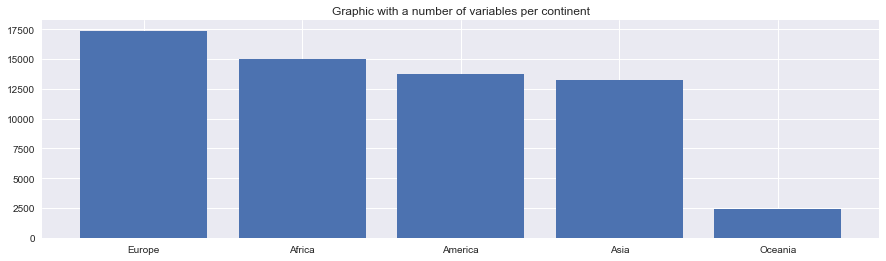

In [27]:
fig = plt.figure(figsize=(15,4))
plt.title('Graphic with a number of variables per continent')
plt.bar(x,y)

We can watch on the Graphic, that we have more observation number  in Europe than in Africa or America. Maybe is due to how many registier there are and not related with the incidence of covid in the continents.
We are going to check how many poplution the are.

### Population

In [28]:
data.continentExp.unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania'], dtype=object)

In [29]:
data.geoId.unique()[1:5]

array(['AL', 'DZ', 'AD', 'AO'], dtype=object)

In [30]:
data.popData2019.unique()[1:4]

array([ 2862427., 43053054.,    76177.])

In [31]:
df_population = pd.DataFrame(data[['continentExp','geoId','countriesAndTerritories','popData2019']])

In [32]:
df_population = df_population.drop_duplicates()
df_population

continentExp geoId countriesAndTerritories  popData2019
0             Asia    AF             Afghanistan  38041757.00
340         Europe    AL                 Albania   2862427.00
621         Africa    DZ                 Algeria  43053054.00
966         Europe    AD                 Andorra     76177.00
1242        Africa    AO                  Angola  31825299.00
...            ...   ...                     ...          ...
60473         Asia    VN                 Vietnam  96462108.00
60878       Africa    EH          Western_Sahara    582458.00
61111         Asia    YE                   Yemen  29161922.00
61360       Africa    ZM                  Zambia  17861034.00
61631       Africa    ZW                Zimbabwe  14645473.00

[212 rows x 4 columns]

Text(0.5, 1.0, 'Graphic Population per contient')

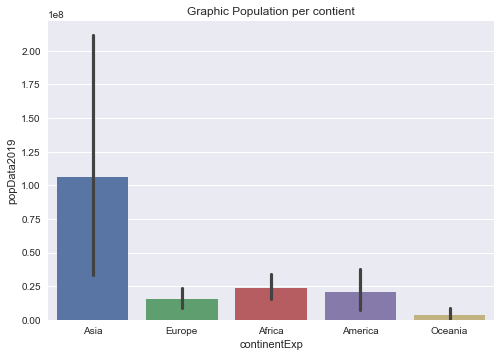

In [33]:
sns.barplot(x ='continentExp', y = 'popData2019', data=df_population )
plt.title('Graphic Population per contient')

## New cases and deaths

In [34]:
df_Asia = data[data['continentExp']== 'Asia']
df_Europe = data[data['continentExp']== 'Europe']
df_Africa = data[data['continentExp']== 'Africa']
df_America = data[data['continentExp']== 'America']
df_Oceania = data[data['continentExp']== 'Oceania']


Text(0.5, 1.0, 'Deaths-Continents')

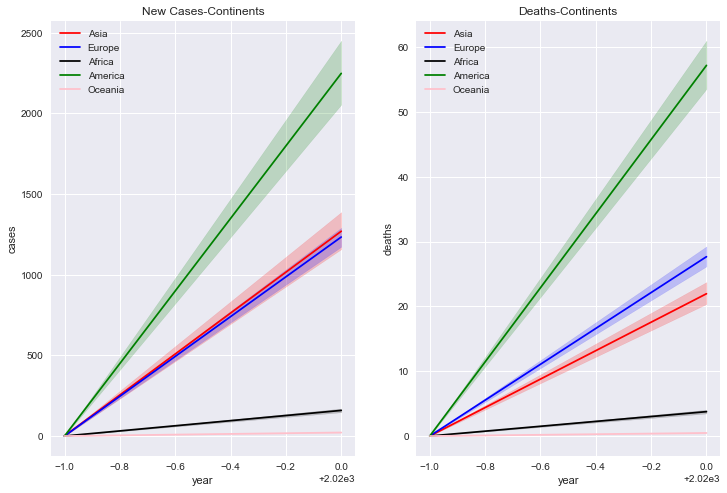

In [35]:
fig = plt.figure(figsize=(12,8))

plt.subplot(121)
sns.lineplot(x =df_Asia.year,y=df_Asia.cases ,color='red')
sns.lineplot(x =df_Europe.year,y=df_Europe.cases, color ='blue')
sns.lineplot(x =df_Africa.year,y=df_Africa.cases, color ='black')
sns.lineplot(x =df_America.year,y=df_America.cases,color ='green')
sns.lineplot(x =df_Oceania.year,y=df_Oceania.cases, color= 'pink')
plt.legend(labels=['Asia','Europe','Africa','America','Oceania'])
plt.title('New Cases-Continents')

plt.subplot(122)
sns.lineplot(x =df_Asia.year,y=df_Asia.deaths ,color='red')
sns.lineplot(x =df_Europe.year,y=df_Europe.deaths, color ='blue')
sns.lineplot(x =df_Africa.year,y=df_Africa.deaths, color ='black')
sns.lineplot(x =df_America.year,y=df_America.deaths,color ='green')
sns.lineplot(x =df_Oceania.year,y=df_Oceania.deaths, color= 'pink')
plt.legend(labels=['Asia','Europe','Africa','America','Oceania'])
plt.title('Deaths-Continents')

In [36]:
df_top = pd.DataFrame(data.groupby(['countriesAndTerritories','geoId'])['cases', 'deaths'].sum())
df_top

cases  deaths
countriesAndTerritories geoId               
Afghanistan             AF     49273    1971
Albania                 AL     48530    1003
Algeria                 DZ     92102    2596
Andorra                 AD      7338      79
Angola                  AO     16188     371
...                              ...     ...
Vietnam                 VN      1397      35
Western_Sahara          EH       766       1
Yemen                   YE      2083     606
Zambia                  ZM     18274     367
Zimbabwe                ZW     11246     307

[212 rows x 2 columns]

In [37]:
# result = pd.merge(left, right, on=["key1", "key2"])

df_total = pd.merge(df_population, df_top, on= ['geoId','geoId']).sort_values(by=['cases','deaths'], ascending=False)

In [38]:
df_total['case/population%'] = round((df_total['cases']/df_total['popData2019'])*100,3)
df_total['deaths/population%'] = round((df_total['deaths']/df_total['popData2019'])*100,3)

In [39]:
df_total.head(20)

continentExp geoId   countriesAndTerritories   popData2019     cases  \
201      America    US  United_States_of_America  329064917.00  16256754   
91          Asia    IN                     India 1366417756.00   9884100   
27       America    BR                    Brazil  211049519.00   6901952   
159       Europe    RU                    Russia  145872260.00   2653928   
69        Europe    FR                    France   67012883.00   2376852   
199       Europe    UK            United_Kingdom   66647112.00   1849403   
98        Europe    IT                     Italy   60359546.00   1843712   
180       Europe    ES                     Spain   46937060.00   1730575   
7        America    AR                 Argentina   44780675.00   1498160   
42       America    CO                  Colombia   50339443.00   1425774   
74        Europe    DE                   Germany   83019213.00   1337078   
126      America    MX                    Mexico  127575529.00   1250044   
154       Europe    PL                    Poland   37972812.00   1135676   
93          Asia    IR                      Iran   82913893.00   1108269   
194       Europe    TR                    Turkey   82003882.00    995471   
152      America    PE                      Peru   32510462.00    984973   
197       Europe    UA                   Ukraine   43993643.00    900666   
177       Africa    ZA              South_Africa   58558267.00    860964   
92          Asia    ID                 Indonesia  270625567.00    617820   
137       Europe    NL               Netherlands   17282163.00    612746   

     deaths  case/population%  deaths/population%  
201  299177              4.94                0.09  
91   143355              0.72                0.01  
27   181402              3.27                0.09  
159   46941              1.82                0.03  
69    57911              3.55                0.09  
199   64170              2.77                0.10  
98    64520              3.06                0.11  
180   47624              3.69                0.10  
7     40766              3.35                0.09  
42    39053              2.83                0.08  
74    21975              1.61                0.03  
126  113953              0.98                0.09  
154   22864              2.99                0.06  
93    52196              1.34                0.06  
194   16199              1.21                0.02  
152   36677              3.03                0.11  
197   15247              2.05                0.04  
177   23276              1.47                0.04  
92    18819              0.23                0.01  
137   10034              3.55                0.06

In [40]:
df = pd.DataFrame(data)

df['case/population%'] = round((df['cases']/df['popData2019'])*100,3)
df['deaths/population%'] = round((df['deaths']/df['popData2019'])*100,3)

Text(0.5, 1.0, '% Cases Population')

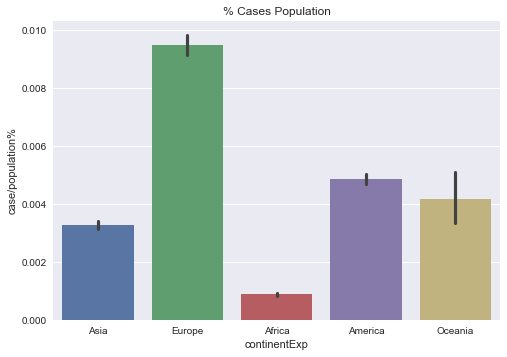

In [41]:
sns.barplot(x='continentExp', y ='case/population%',data= df)
plt.title('% Cases Population')

Text(0.5, 1.0, 'Number of Cases')

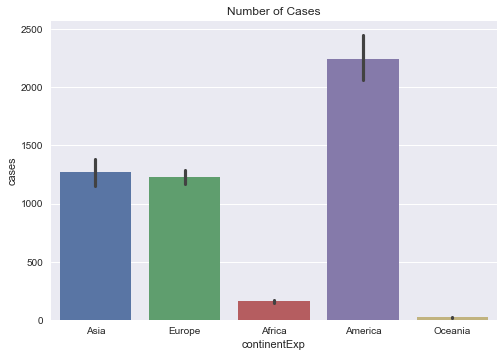

In [42]:
sns.barplot(x='continentExp', y ='cases',data= df)
plt.title('Number of Cases')

Text(0.5, 1.0, '% Deaths Population')

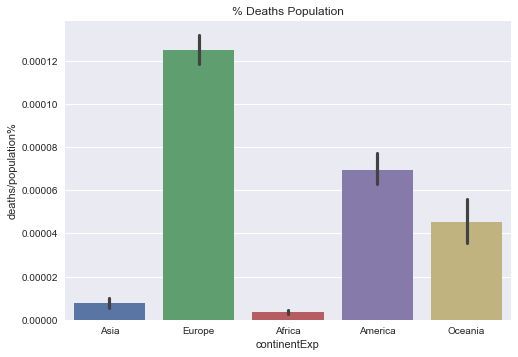

In [43]:
sns.barplot(x='continentExp', y ='deaths/population%',data= df)
plt.title('% Deaths Population')

Text(0.5, 1.0, 'Num Deaths')

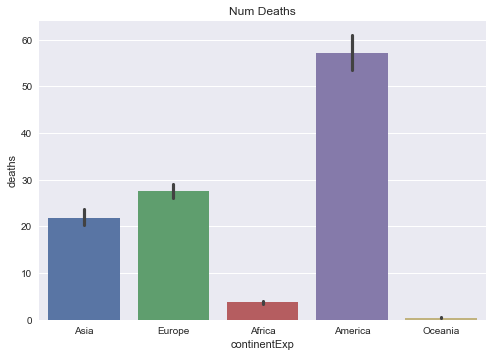

In [44]:
sns.barplot(x='continentExp', y ='deaths',data= df)
plt.title('Num Deaths')

we will see the covid-19 evolución temporarily

In [45]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp', '14_days_1000', 'Yearmonth',
       'case/population%', 'deaths/population%'],
      dtype='object')

In [46]:
#order columns change 1
df = df[['Yearmonth','cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp', '14_days_1000', 'case/population%',
       'deaths/population%']]

Text(0.5, 1.0, 'Cases world evolution')

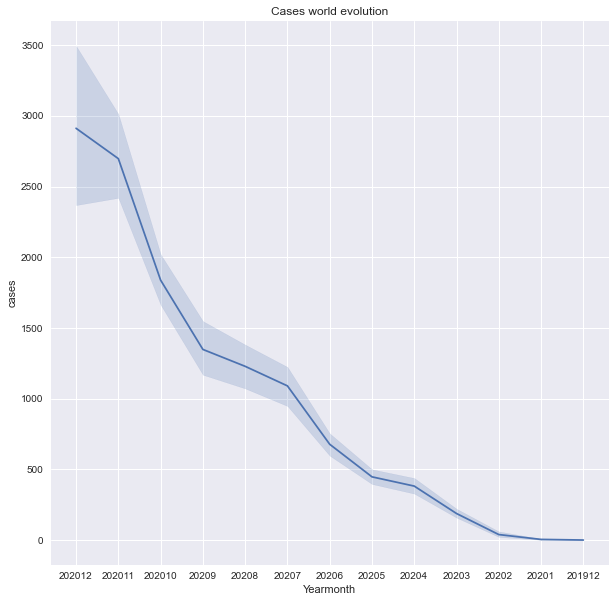

In [47]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Yearmonth', y ='cases',data=df,)
plt.title('Cases world evolution')

Text(0.5, 1.0, 'Deaths world evolution')

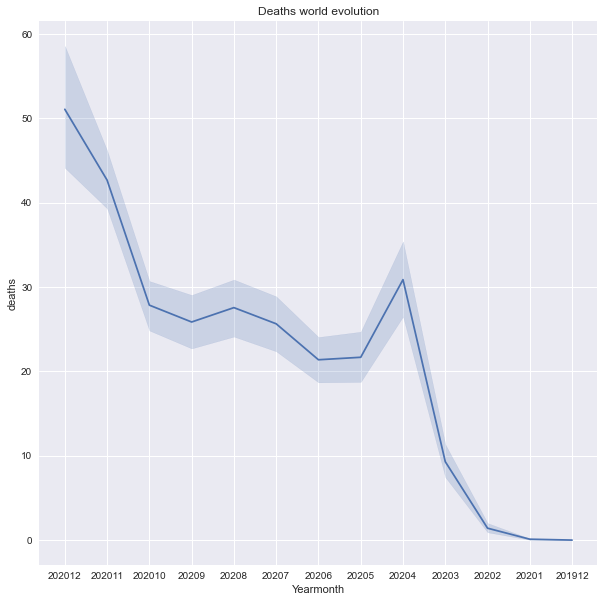

In [48]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Yearmonth', y ='deaths',data=df)
plt.title('Deaths world evolution')

[Text(0, 0, '202012'),
 Text(1, 0, '202012'),
 Text(2, 0, '202012'),
 Text(3, 0, '202012'),
 Text(4, 0, '202012'),
 Text(5, 0, '202012'),
 Text(6, 0, '202012'),
 Text(7, 0, '202012'),
 Text(8, 0, '202012'),
 Text(9, 0, '202012'),
 Text(10, 0, '202012'),
 Text(11, 0, '202012'),
 Text(12, 0, '202012')]

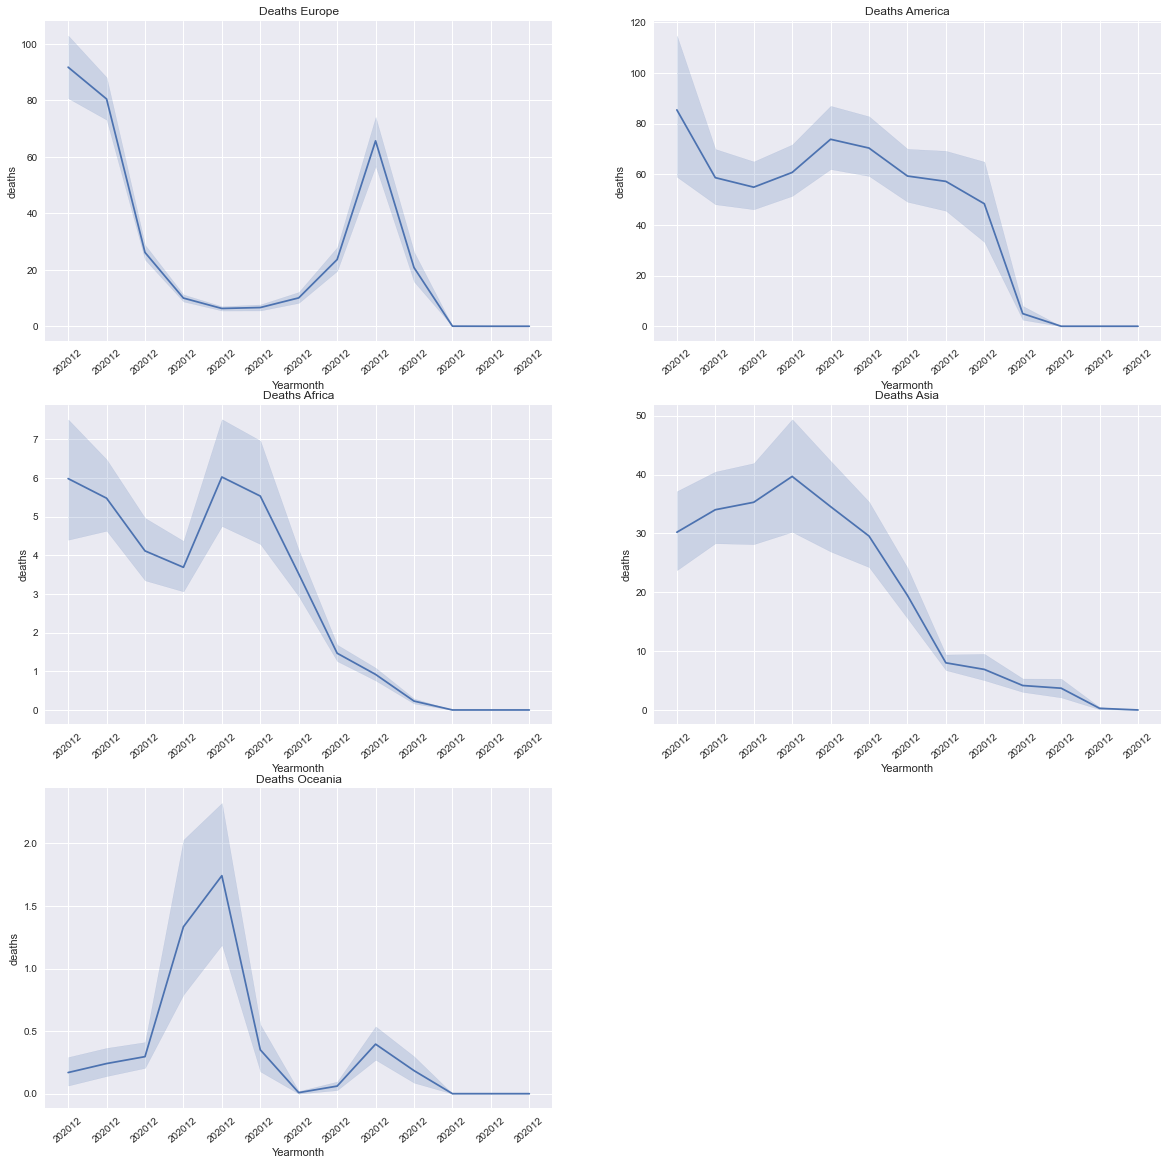

In [49]:
fig = plt.figure(figsize=(20,20))

xlabels = df.Yearmonth

ax1 = fig.add_subplot(3,2,1)
ax1 = sns.lineplot(x='Yearmonth', y ='deaths',data=df_Europe)
ax1.title.set_text('Deaths Europe')
ax1.set_xticklabels(xlabels, rotation=40)

ax2= fig.add_subplot(3,2,2)
ax2= sns.lineplot(x='Yearmonth', y ='deaths',data=df_America)
ax2.title.set_text('Deaths America')
ax2.set_xticklabels(xlabels, rotation=40)


ax3=fig.add_subplot(3,2,3)
ax3=sns.lineplot(x='Yearmonth', y ='deaths',data=df_Africa)
ax3.title.set_text('Deaths Africa')
ax3.set_xticklabels(xlabels, rotation=40)


ax4=fig.add_subplot(3,2,4)
ax4=sns.lineplot(x='Yearmonth', y ='deaths',data=df_Asia)
ax4.title.set_text('Deaths Asia')
ax4.set_xticklabels(xlabels, rotation=40)


ax5=fig.add_subplot(3,2,5)
ax5=sns.lineplot(x='Yearmonth', y ='deaths',data=df_Oceania)
ax5.title.set_text('Deaths Oceania')
ax5.set_xticklabels(xlabels, rotation=40)



[Text(0, 0, '202012'),
 Text(1, 0, '202012'),
 Text(2, 0, '202012'),
 Text(3, 0, '202012'),
 Text(4, 0, '202012'),
 Text(5, 0, '202012'),
 Text(6, 0, '202012'),
 Text(7, 0, '202012'),
 Text(8, 0, '202012'),
 Text(9, 0, '202012'),
 Text(10, 0, '202012'),
 Text(11, 0, '202012'),
 Text(12, 0, '202012')]

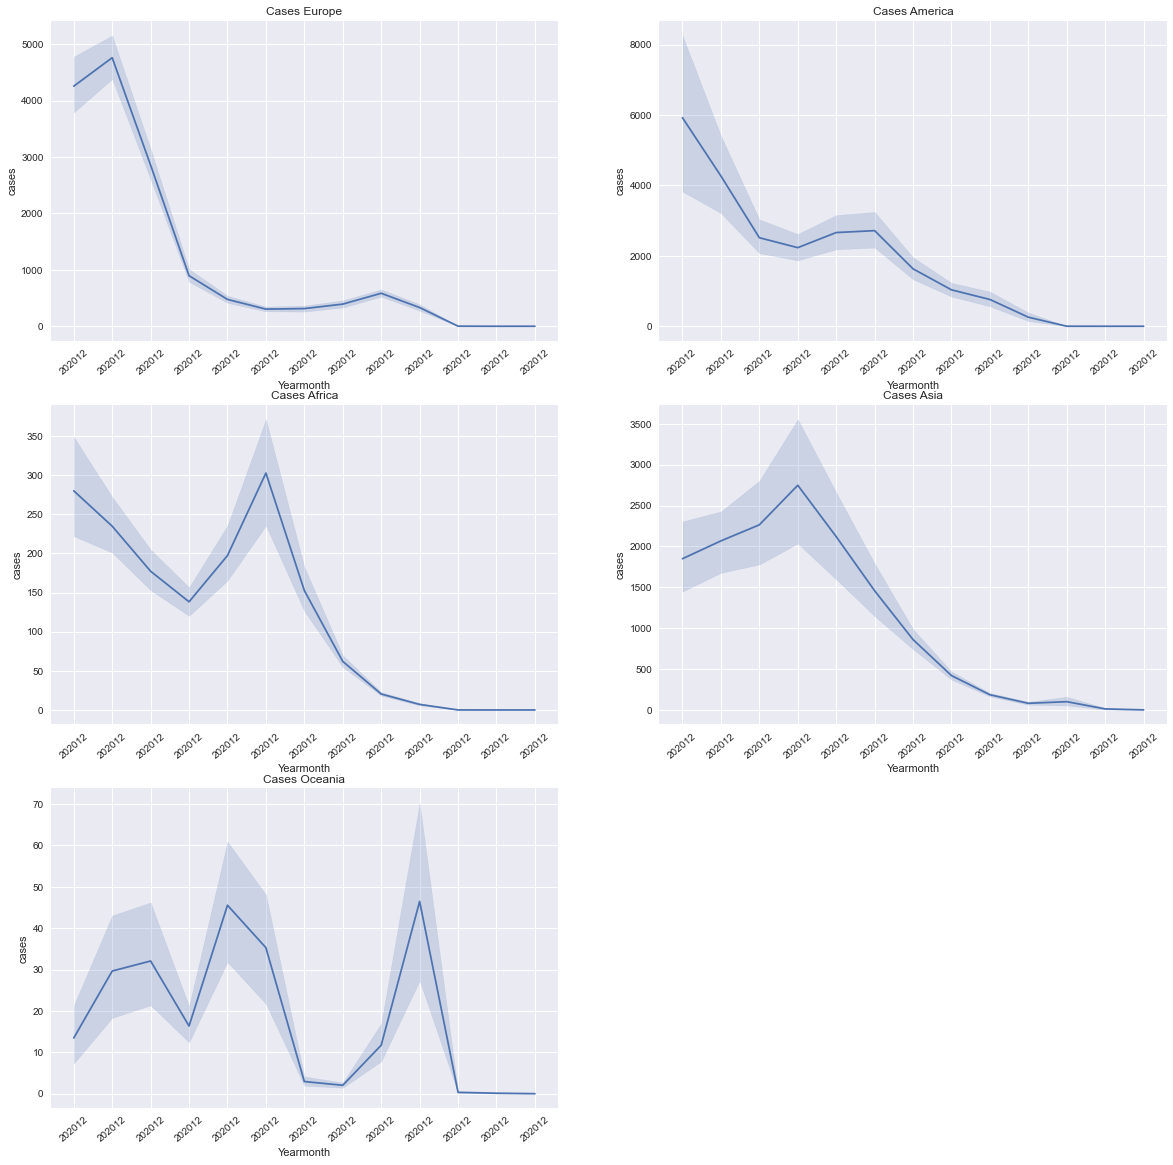

In [50]:
fig = plt.figure(figsize=(20,20))

xlabels = df.Yearmonth

ax1 = fig.add_subplot(3,2,1)
ax1 = sns.lineplot(x='Yearmonth', y ='cases',data=df_Europe)
ax1.title.set_text('Cases Europe')
ax1.set_xticklabels(xlabels, rotation=40)

ax2= fig.add_subplot(3,2,2)
ax2= sns.lineplot(x='Yearmonth', y ='cases',data=df_America)
ax2.title.set_text('Cases America')
ax2.set_xticklabels(xlabels, rotation=40)

ax3=fig.add_subplot(3,2,3)
ax3=sns.lineplot(x='Yearmonth', y ='cases',data=df_Africa)
ax3.title.set_text('Cases Africa')
ax3.set_xticklabels(xlabels, rotation=40)


ax4=fig.add_subplot(3,2,4)
ax4=sns.lineplot(x='Yearmonth', y ='cases',data=df_Asia)
ax4.title.set_text('Cases Asia')
ax4.set_xticklabels(xlabels, rotation=40)


ax5=fig.add_subplot(3,2,5)
ax5=sns.lineplot(x='Yearmonth', y ='cases',data=df_Oceania)
ax5.title.set_text('Cases Oceania')
ax5.set_xticklabels(xlabels, rotation=40)


## Dealing with outliers

Text(0.5, 1.0, 'deaths')

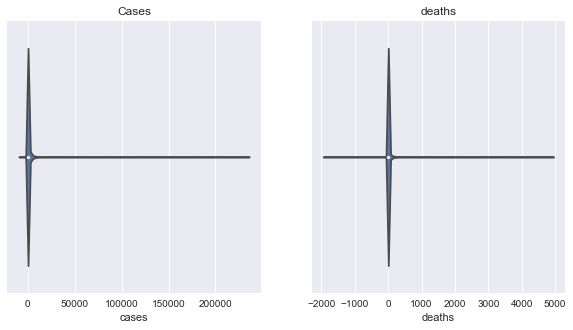

In [51]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
sns.violinplot(x= 'cases',  data = df, orient='h' ,ax = ax1)
plt.title('Cases')

ax2 = fig.add_subplot(122)
sns.violinplot(x= 'deaths',  data = df, orient='h' ,ax = ax2)
plt.title('deaths')

In [52]:
df.shape

(61777, 11)

In [53]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [54]:
df_2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_2.shape)

(41169, 11)


In [55]:
df = df_2

In [56]:
df

Yearmonth  cases  deaths countriesAndTerritories geoId  \
1        202012    298       9             Afghanistan    AF   
3        202012     63      10             Afghanistan    AF   
6        202012    200       6             Afghanistan    AF   
8        202012    234      10             Afghanistan    AF   
10       202012    119       5             Afghanistan    AF   
...         ...    ...     ...                     ...   ...   
61895     20203      0       0                Zimbabwe    ZW   
61896     20203      0       1                Zimbabwe    ZW   
61897     20203      0       0                Zimbabwe    ZW   
61898     20203      1       0                Zimbabwe    ZW   
61899     20203      1       0                Zimbabwe    ZW   

      countryterritoryCode  popData2019 continentExp  14_days_1000  \
1                      AFG  38041757.00         Asia          7.05   
3                      AFG  38041757.00         Asia          7.13   
6                      AFG  38041757.00         Asia          7.09   
8                      AFG  38041757.00         Asia          7.33   
10                     AFG  38041757.00         Asia          7.11   
...                    ...          ...          ...           ...   
61895                  ZWE  14645473.00       Africa          0.00   
61896                  ZWE  14645473.00       Africa          0.00   
61897                  ZWE  14645473.00       Africa          0.00   
61898                  ZWE  14645473.00       Africa          0.00   
61899                  ZWE  14645473.00       Africa          0.00   

       case/population%  deaths/population%  
1                  0.00                0.00  
3                  0.00                0.00  
6                  0.00                0.00  
8                  0.00                0.00  
10                 0.00                0.00  
...                 ...                 ...  
61895              0.00                0.00  
61896              0.00                0.00  
61897              0.00                0.00  
61898              0.00                0.00  
61899              0.00                0.00  

[41169 rows x 11 columns]

Text(0.5, 1.0, 'deaths')

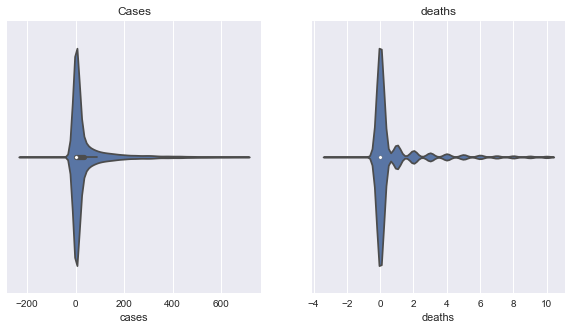

In [57]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
sns.violinplot(x= 'cases',  data = df, orient='h' ,ax = ax1)
plt.title('Cases')

ax2 = fig.add_subplot(122)
sns.violinplot(x= 'deaths',  data = df, orient='h' ,ax = ax2)
plt.title('deaths')

Text(0.5, 1.0, 'deaths/population%')

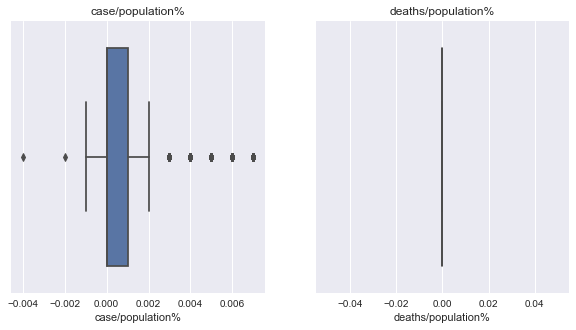

In [58]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
sns.boxplot(x= 'case/population%',  data = df, orient='h' ,ax = ax1)
plt.title('case/population%')

ax2 = fig.add_subplot(122)
sns.boxplot(x= 'deaths/population%',  data = df, orient='h' ,ax = ax2)
plt.title('deaths/population%')

## Clustering

In [59]:
df

Yearmonth  cases  deaths countriesAndTerritories geoId  \
1        202012    298       9             Afghanistan    AF   
3        202012     63      10             Afghanistan    AF   
6        202012    200       6             Afghanistan    AF   
8        202012    234      10             Afghanistan    AF   
10       202012    119       5             Afghanistan    AF   
...         ...    ...     ...                     ...   ...   
61895     20203      0       0                Zimbabwe    ZW   
61896     20203      0       1                Zimbabwe    ZW   
61897     20203      0       0                Zimbabwe    ZW   
61898     20203      1       0                Zimbabwe    ZW   
61899     20203      1       0                Zimbabwe    ZW   

      countryterritoryCode  popData2019 continentExp  14_days_1000  \
1                      AFG  38041757.00         Asia          7.05   
3                      AFG  38041757.00         Asia          7.13   
6                      AFG  38041757.00         Asia          7.09   
8                      AFG  38041757.00         Asia          7.33   
10                     AFG  38041757.00         Asia          7.11   
...                    ...          ...          ...           ...   
61895                  ZWE  14645473.00       Africa          0.00   
61896                  ZWE  14645473.00       Africa          0.00   
61897                  ZWE  14645473.00       Africa          0.00   
61898                  ZWE  14645473.00       Africa          0.00   
61899                  ZWE  14645473.00       Africa          0.00   

       case/population%  deaths/population%  
1                  0.00                0.00  
3                  0.00                0.00  
6                  0.00                0.00  
8                  0.00                0.00  
10                 0.00                0.00  
...                 ...                 ...  
61895              0.00                0.00  
61896              0.00                0.00  
61897              0.00                0.00  
61898              0.00                0.00  
61899              0.00                0.00  

[41169 rows x 11 columns]

In [60]:
labelencoder = LabelEncoder()
df['countriesAndTerritories_LE'] = labelencoder.fit_transform(df['countriesAndTerritories']).astype('int64')
df['continentExp_LE'] = labelencoder.fit_transform(df['continentExp']).astype('int64')
df['Yearmonth_LE'] = labelencoder.fit_transform(df['Yearmonth']).astype('int64')


In [61]:
df_Clusters = df.select_dtypes(['int64','float64'])

In [62]:
df_Clusters = df_Clusters[['countriesAndTerritories_LE','continentExp_LE','cases','deaths','popData2019','14_days_1000','case/population%','deaths/population%']]
df_Clusters

countriesAndTerritories_LE  continentExp_LE  cases  deaths  \
1                               0                2    298       9   
3                               0                2     63      10   
6                               0                2    200       6   
8                               0                2    234      10   
10                              0                2    119       5   
...                           ...              ...    ...     ...   
61895                         191                0      0       0   
61896                         191                0      0       1   
61897                         191                0      0       0   
61898                         191                0      1       0   
61899                         191                0      1       0   

       popData2019  14_days_1000  case/population%  deaths/population%  
1      38041757.00          7.05              0.00                0.00  
3      38041757.00          7.13              0.00                0.00  
6      38041757.00          7.09              0.00                0.00  
8      38041757.00          7.33              0.00                0.00  
10     38041757.00          7.11              0.00                0.00  
...            ...           ...               ...                 ...  
61895  14645473.00          0.00              0.00                0.00  
61896  14645473.00          0.00              0.00                0.00  
61897  14645473.00          0.00              0.00                0.00  
61898  14645473.00          0.00              0.00                0.00  
61899  14645473.00          0.00              0.00                0.00  

[41169 rows x 8 columns]

#### Hopkins Statistics

To understand if the dataset can be clustered, we used the Hopkins statistic, which tests the spatial randomness of the data and indicates the cluster tendency or how well the data can be clustered. It calculates the probability that a given data is generated by a uniform distribution (Alboukadel Kassambara, n.d.). The inference is as follows for a data of dimensions ‘d’:

If the value is around 0.5 or lesser, the data is uniformly distributed and hence it is unlikely to have statistically significant clusters.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster and therefore likely to have statistically significant clusters.



In [63]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [64]:
hopkins(df_Clusters)

0.9999957364369961

In [65]:
#we have modified the dataset order fields

df=df[['Yearmonth','Yearmonth_LE','continentExp','continentExp_LE', 'countriesAndTerritories','countriesAndTerritories_LE','cases', 'deaths',  'geoId',
       'countryterritoryCode', 'popData2019',  '14_days_1000','case/population%', 'deaths/population%']]
df.to_csv('123.csv')

In [66]:
scaler = StandardScaler()

In [67]:
df_Clusters_features =scaler.fit_transform(df_Clusters)

### Accoring to SEE: elbow method

In [68]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_Clusters_features)
    sse.append(kmeans.inertia_)

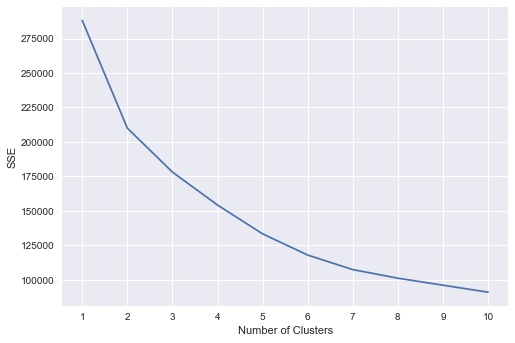

In [69]:
#plt.style.use("fivethirtyeight")
plt.style.use("seaborn")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [70]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

4

### accordint to  silhouette coefficient 

In [71]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_Clusters_features) 
    score = silhouette_score(df_Clusters_features, kmeans.labels_)
    silhouette_coefficients.append(score)

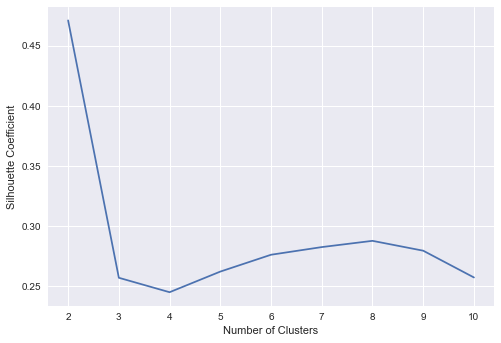

In [72]:
#plt.style.use("fivethirtyeight")
plt.style.use("seaborn")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Metrics to evaluate the clustering

In [73]:
# Instantiate k-means and dbscan algorithms
kmeans_4 = KMeans(n_clusters=kl.elbow)
kmeans_3 = KMeans(n_clusters=3)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans_4.fit(df_Clusters_features)
kmeans_3.fit(df_Clusters_features)
dbscan.fit(df_Clusters_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette_4 = silhouette_score(df_Clusters_features, kmeans_4.labels_).round(2)
kmeans_silhouette_3 = silhouette_score(df_Clusters_features, kmeans_3.labels_).round(2)
dbscan_silhouette = silhouette_score(df_Clusters_features, dbscan.labels_).round (2)

#kmeans_silhoutte = silhouette_score(x, y)
#values should be between 1 and -1

In [74]:
print('Number of clusters 4: ', kmeans_silhouette_4)
print('Number of clusters 3: ',kmeans_silhouette_3)
print('Number of clusters Dbescan: ',dbscan_silhouette)

Number of clusters 4:  0.25
Number of clusters 3:  0.26
Number of clusters Dbescan:  0.2


In [75]:
clustering = KMeans(n_clusters=kl.elbow ,max_iter=300)
clustering.fit(df_Clusters_features)

KMeans(n_clusters=4)

In [76]:
# The lowest SSE value
clustering.inertia_

154152.06990279324

In [77]:
# Final locations of the centroid
clustering.cluster_centers_

array([[-0.1110643 , -0.83574028, -0.34999366, -0.31980855, -0.33593233,
        -0.22457322, -0.29592989,  0.        ],
       [-0.05564281,  0.39363896,  1.85516399,  1.46975024, -0.11057389,
         1.94997133,  2.19975428,  0.        ],
       [ 0.52421627, -0.28985184,  0.22550637,  0.33927476,  1.87002791,
        -0.37532663, -0.35005109,  0.        ],
       [-0.08765789,  1.0521799 , -0.30286594, -0.26197073, -0.41868416,
        -0.21069225, -0.21860239,  0.        ]])

In [78]:
# The number of iterations required to converge
clustering.n_iter_

14

In [79]:
clustering.labels_

array([1, 2, 2, ..., 0, 0, 0])

In [80]:
df['kmeans_cluster']=clustering.labels_

In [81]:
df[['kmeans_cluster']]=df['kmeans_cluster'].astype('int64')

In [82]:
centroids = clustering.cluster_centers_

### Graphing the clusters  with elbow
#### PCA for Graphing

In [83]:
pca = PCA(n_components=2)

In [84]:
pca_1 = pca.fit_transform(df_Clusters_features)

In [85]:
pca_df = pd.DataFrame(pca_1, columns=['PCA1','PCA2'])
pca_df['kmeans_cluster'] = clustering.labels_

In [86]:
pca_df

PCA1  PCA2  kmeans_cluster
0      3.50  2.81               1
1      2.20  2.55               2
2      2.27  2.05               2
3      3.43  2.82               1
4      1.23  1.83               2
...     ...   ...             ...
41164 -1.09  1.12               0
41165 -0.84  1.29               0
41166 -1.09  1.12               0
41167 -1.09  1.13               0
41168 -1.09  1.13               0

[41169 rows x 3 columns]

In [87]:
colors = ['r','b','y','g','c','m']

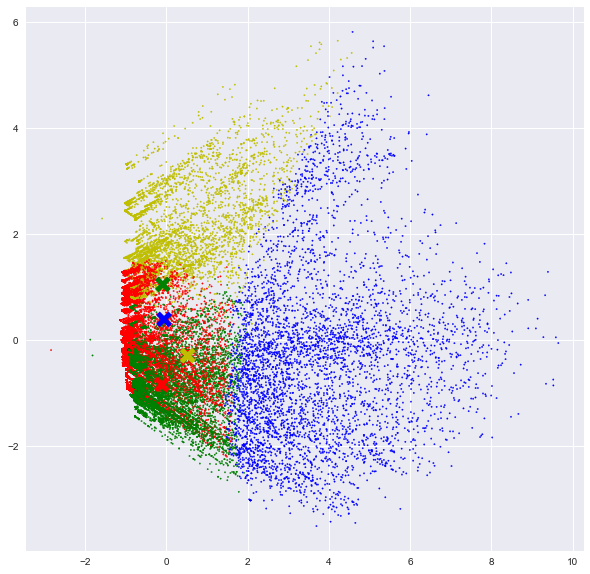

In [88]:
plt.figure(figsize=(10,10))  
plt.scatter(pca_df['PCA1'], pca_df['PCA2'],color=[colors[l_] for l_ in clustering.labels_], label=clustering.labels_, s=2) 
plt.scatter(centroids[:, 0],centroids[:, 1], color=[c for c in colors[:len(centroids)]], marker = "x", s=150, linewidths = 5, zorder = 10)

In [89]:
df.kmeans_cluster.unique()

array([1, 2, 3, 0], dtype=int64)

In [90]:
df.to_csv('123.csv')

## Clusters Analysis 

The analysis of clustres you can count thr variable you have. Numerical variable (std, mitja,etc and  numerical variable you cant count how many variables you have.

In [91]:
df.kmeans_cluster.value_counts()

0    16858
3    13403
2     6304
1     4604
Name: kmeans_cluster, dtype: int64

In [92]:
#we create a a groupby per labels

labels_grp = df.groupby(['kmeans_cluster'])

In [93]:
labels_grp

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41169 entries, 1 to 61899
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Yearmonth                   41169 non-null  object 
 1   Yearmonth_LE                41169 non-null  int64  
 2   continentExp                41169 non-null  object 
 3   continentExp_LE             41169 non-null  int64  
 4   countriesAndTerritories     41169 non-null  object 
 5   countriesAndTerritories_LE  41169 non-null  int64  
 6   cases                       41169 non-null  int64  
 7   deaths                      41169 non-null  int64  
 8   geoId                       41169 non-null  object 
 9   countryterritoryCode        41169 non-null  object 
 10  popData2019                 41169 non-null  float64
 11  14_days_1000                41169 non-null  float64
 12  case/population%            41169 non-null  float64
 13  deaths/population%          411

In [95]:
categories = df.select_dtypes(['object'])
numerical = df.select_dtypes(['int64','float64'])

In [96]:
categories.columns

Index(['Yearmonth', 'continentExp', 'countriesAndTerritories', 'geoId',
       'countryterritoryCode'],
      dtype='object')

In [97]:
numerical.columns

Index(['Yearmonth_LE', 'continentExp_LE', 'countriesAndTerritories_LE',
       'cases', 'deaths', 'popData2019', '14_days_1000', 'case/population%',
       'deaths/population%', 'kmeans_cluster'],
      dtype='object')

In [98]:
#we prove how many categorical variable we have
len(df.Yearmonth.unique())

13

In [99]:
for i in range (0,kl.elbow):
    x = len(labels_grp.get_group(i)['Yearmonth'].unique())
    print(x)

13
10
13
13


In [100]:
len(df.continentExp.unique())

5

In [101]:
for i in range (0,kl.elbow):
    x = len(labels_grp.get_group(i)['continentExp'].unique())
    print(x)

2
5
5
3


In [102]:
for i in range (0,kl.elbow):
    x = len(labels_grp.get_group(i)['countriesAndTerritories'].unique())
    print(x)

83
151
58
78


# Check Cluster 0

In [103]:
Cluster0 = df[df['kmeans_cluster']==0]
Checkcluster = Cluster0

In [104]:
Checkcluster

Yearmonth  Yearmonth_LE continentExp  continentExp_LE  \
1249     202012             4       Africa                0   
1262     202011             3       Africa                0   
1309     202010             2       Africa                0   
1311     202010             2       Africa                0   
1323      20209            12       Africa                0   
...         ...           ...          ...              ...   
61895     20203             6       Africa                0   
61896     20203             6       Africa                0   
61897     20203             6       Africa                0   
61898     20203             6       Africa                0   
61899     20203             6       Africa                0   

      countriesAndTerritories  countriesAndTerritories_LE  cases  deaths  \
1249                   Angola                           4      0       0   
1262                   Angola                           4      0       0   
1309                   Angola                           4      0       0   
1311                   Angola                           4      0       0   
1323                   Angola                           4      0       0   
...                       ...                         ...    ...     ...   
61895                Zimbabwe                         191      0       0   
61896                Zimbabwe                         191      0       1   
61897                Zimbabwe                         191      0       0   
61898                Zimbabwe                         191      1       0   
61899                Zimbabwe                         191      1       0   

      geoId countryterritoryCode  popData2019  14_days_1000  case/population%  \
1249     AO                  AGO  31825299.00          3.28              0.00   
1262     AO                  AGO  31825299.00          6.47              0.00   
1309     AO                  AGO  31825299.00          4.68              0.00   
1311     AO                  AGO  31825299.00          3.94              0.00   
1323     AO                  AGO  31825299.00          3.78              0.00   
...     ...                  ...          ...           ...               ...   
61895    ZW                  ZWE  14645473.00          0.00              0.00   
61896    ZW                  ZWE  14645473.00          0.00              0.00   
61897    ZW                  ZWE  14645473.00          0.00              0.00   
61898    ZW                  ZWE  14645473.00          0.00              0.00   
61899    ZW                  ZWE  14645473.00          0.00              0.00   

       deaths/population%  kmeans_cluster  
1249                 0.00               0  
1262                 0.00               0  
1309                 0.00               0  
1311                 0.00               0  
1323                 0.00               0  
...                   ...             ...  
61895                0.00               0  
61896                0.00               0  
61897                0.00               0  
61898                0.00               0  
61899                0.00               0  

[16858 rows x 15 columns]

In [105]:
Checkcluster.describe()

Yearmonth_LE  continentExp_LE  countriesAndTerritories_LE    cases  \
count      16858.00         16858.00                    16858.00 16858.00   
mean           7.42             0.44                       88.60    10.10   
std            3.22             0.50                       56.48    22.87   
min            0.00             0.00                        4.00  -209.00   
25%            4.00             0.00                       40.00     0.00   
50%            8.00             0.00                       76.00     0.00   
75%           10.00             1.00                      145.00     8.00   
max           12.00             1.00                      191.00   231.00   

        deaths  popData2019  14_days_1000  case/population%  \
count 16858.00     16858.00      16858.00          16858.00   
mean      0.16   6164112.83          6.22              0.00   
std       0.58   7359260.56         12.84              0.00   
min       0.00      3372.00         -1.26             -0.00   
25%       0.00    182795.00          0.18              0.00   
50%       0.00   2347696.00          1.74              0.00   
75%       0.00  11333484.00          5.77              0.00   
max       7.00  31825299.00        111.04              0.01   

       deaths/population%  kmeans_cluster  
count            16858.00        16858.00  
mean                 0.00            0.00  
std                  0.00            0.00  
min                  0.00            0.00  
25%                  0.00            0.00  
50%                  0.00            0.00  
75%                  0.00            0.00  
max                  0.00            0.00

[Text(0, 0, '202012'),
 Text(1, 0, '202011'),
 Text(2, 0, '202010'),
 Text(3, 0, '20209'),
 Text(4, 0, '20208'),
 Text(5, 0, '20207'),
 Text(6, 0, '20206'),
 Text(7, 0, '20205'),
 Text(8, 0, '20204'),
 Text(9, 0, '20203'),
 Text(10, 0, '20202'),
 Text(11, 0, '20201'),
 Text(12, 0, '201912')]

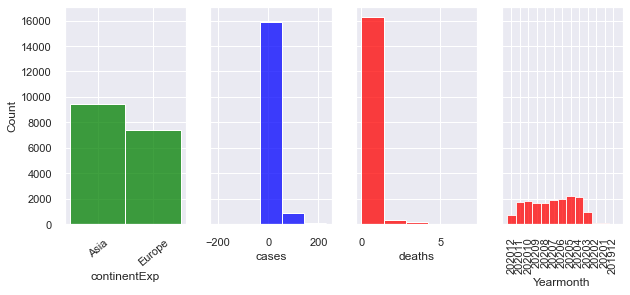

In [106]:
sns.set(style="darkgrid")
xlabels= df.continentExp.unique()
xlabels2= df.Yearmonth.unique()

fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(ncols=4, sharey=True,figsize=(10, 4))
sns.histplot(x='continentExp', data=Checkcluster,bins=5, color='green',ax= ax1)
sns.histplot(x='cases', data=Checkcluster,bins=5, color='blue',ax= ax2)
sns.histplot(x='deaths', data=Checkcluster,bins=5, color='red',ax= ax3)
sns.histplot(x='Yearmonth', data=Checkcluster,bins=5, color='red',ax= ax4)
ax1.set_xticklabels(xlabels, rotation=40)
ax4.set_xticklabels(xlabels2, rotation=90)


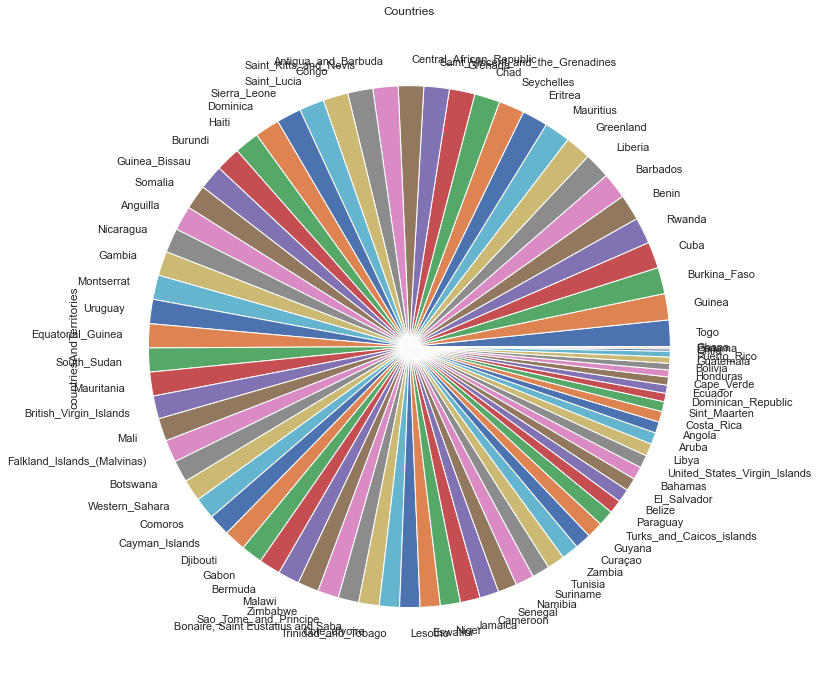

In [107]:
# Pie chart de Dest
plot = Checkcluster['countriesAndTerritories'].value_counts().plot(kind='pie', 
                                            figsize=(12, 12),
                                            title='Countries')

In [108]:
Checkcluster['countriesAndTerritories'].head(50)

1249    Angola
1262    Angola
1309    Angola
1311    Angola
1323    Angola
1328    Angola
1331    Angola
1339    Angola
1346    Angola
1358    Angola
1361    Angola
1364    Angola
1369    Angola
1373    Angola
1375    Angola
1381    Angola
1384    Angola
1387    Angola
1388    Angola
1389    Angola
1390    Angola
1394    Angola
1395    Angola
1401    Angola
1402    Angola
1403    Angola
1409    Angola
1411    Angola
1412    Angola
1413    Angola
1414    Angola
1416    Angola
1418    Angola
1420    Angola
1422    Angola
1423    Angola
1424    Angola
1426    Angola
1428    Angola
1429    Angola
1430    Angola
1431    Angola
1432    Angola
1433    Angola
1434    Angola
1435    Angola
1436    Angola
1437    Angola
1438    Angola
1439    Angola
Name: countriesAndTerritories, dtype: object

# Check Cluster 1

In [109]:
Cluster1 = df[df['kmeans_cluster']==1]
Checkcluster = Cluster1

In [110]:
Checkcluster

Yearmonth  Yearmonth_LE continentExp  continentExp_LE  \
1        202012             4         Asia                2   
8        202012             4         Asia                2   
21       202011             3         Asia                2   
162       20207            10         Asia                2   
170       20206             9         Asia                2   
...         ...           ...          ...              ...   
61504     20207            10       Africa                0   
61728     20209            12       Africa                0   
61747     20208            11       Africa                0   
61763     20208            11       Africa                0   
61765     20208            11       Africa                0   

      countriesAndTerritories  countriesAndTerritories_LE  cases  deaths  \
1                 Afghanistan                           0    298       9   
8                 Afghanistan                           0    234      10   
21                Afghanistan                           0    252       8   
162               Afghanistan                           0    348       7   
170               Afghanistan                           0    276       8   
...                       ...                         ...    ...     ...   
61504                  Zambia                         190    257       8   
61728                Zimbabwe                         191    321       3   
61747                Zimbabwe                         191    265       9   
61763                Zimbabwe                         191    154      10   
61765                Zimbabwe                         191    490       2   

      geoId countryterritoryCode  popData2019  14_days_1000  case/population%  \
1        AF                  AFG  38041757.00          7.05              0.00   
8        AF                  AFG  38041757.00          7.33              0.00   
21       AF                  AFG  38041757.00          6.66              0.00   
162      AF                  AFG  38041757.00         11.17              0.00   
170      AF                  AFG  38041757.00         18.15              0.00   
...     ...                  ...          ...           ...               ...   
61504    ZM                  ZMB  17861034.00          9.45              0.00   
61728    ZW                  ZWE  14645473.00          8.38              0.00   
61747    ZW                  ZWE  14645473.00          8.90              0.00   
61763    ZW                  ZWE  14645473.00         16.13              0.00   
61765    ZW                  ZWE  14645473.00         14.89              0.00   

       deaths/population%  kmeans_cluster  
1                    0.00               1  
8                    0.00               1  
21                   0.00               1  
162                  0.00               1  
170                  0.00               1  
...                   ...             ...  
61504                0.00               1  
61728                0.00               1  
61747                0.00               1  
61763                0.00               1  
61765                0.00               1  

[4604 rows x 15 columns]

In [111]:
Checkcluster.describe()

Yearmonth_LE  continentExp_LE  countriesAndTerritories_LE   cases  \
count       4604.00          4604.00                     4604.00 4604.00   
mean           8.19             2.03                       91.60  240.12   
std            3.36             1.07                       55.00  180.10   
min            2.00             0.00                        0.00    0.00   
25%            7.00             1.00                       49.00   95.75   
50%            9.00             2.00                       90.00  203.00   
75%           11.00             3.00                      139.00  364.25   
max           12.00             4.00                      191.00  690.00   

       deaths  popData2019  14_days_1000  case/population%  \
count 4604.00      4604.00       4604.00           4604.00   
mean     3.33   9239466.19         49.83              0.00   
std      3.06  10298325.86         28.23              0.00   
min      0.00     14872.00          0.00              0.00   
25%      0.00   2794184.00         26.65              0.00   
50%      3.00   6415851.00         45.27              0.00   
75%      6.00  10276617.00         69.36              0.01   
max     10.00  66647112.00        116.83              0.01   

       deaths/population%  kmeans_cluster  
count             4604.00         4604.00  
mean                 0.00            1.00  
std                  0.00            0.00  
min                  0.00            1.00  
25%                  0.00            1.00  
50%                  0.00            1.00  
75%                  0.00            1.00  
max                  0.00            1.00

[Text(0, 0, '202012'),
 Text(1, 0, '202011'),
 Text(2, 0, '202010'),
 Text(3, 0, '20209'),
 Text(4, 0, '20208'),
 Text(5, 0, '20207'),
 Text(6, 0, '20206'),
 Text(7, 0, '20205'),
 Text(8, 0, '20204'),
 Text(9, 0, '20203')]

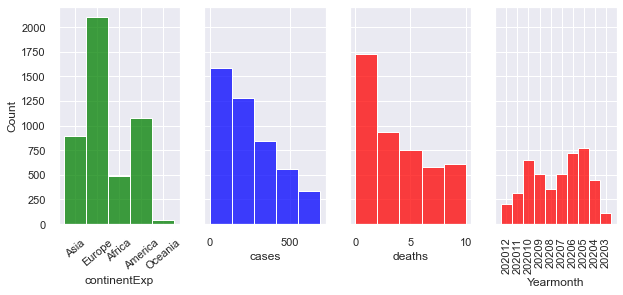

In [112]:
sns.set(style="darkgrid")
xlabels= df.continentExp.unique()
xlabels2= df.Yearmonth.unique()

fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(ncols=4, sharey=True,figsize=(10, 4))
sns.histplot(x='continentExp', data=Checkcluster,bins=5, color='green',ax= ax1)
sns.histplot(x='cases', data=Checkcluster,bins=5, color='blue',ax= ax2)
sns.histplot(x='deaths', data=Checkcluster,bins=5, color='red',ax= ax3)
sns.histplot(x='Yearmonth', data=Checkcluster,bins=5, color='red',ax= ax4)
ax1.set_xticklabels(xlabels, rotation=40)
ax4.set_xticklabels(xlabels2, rotation=90)


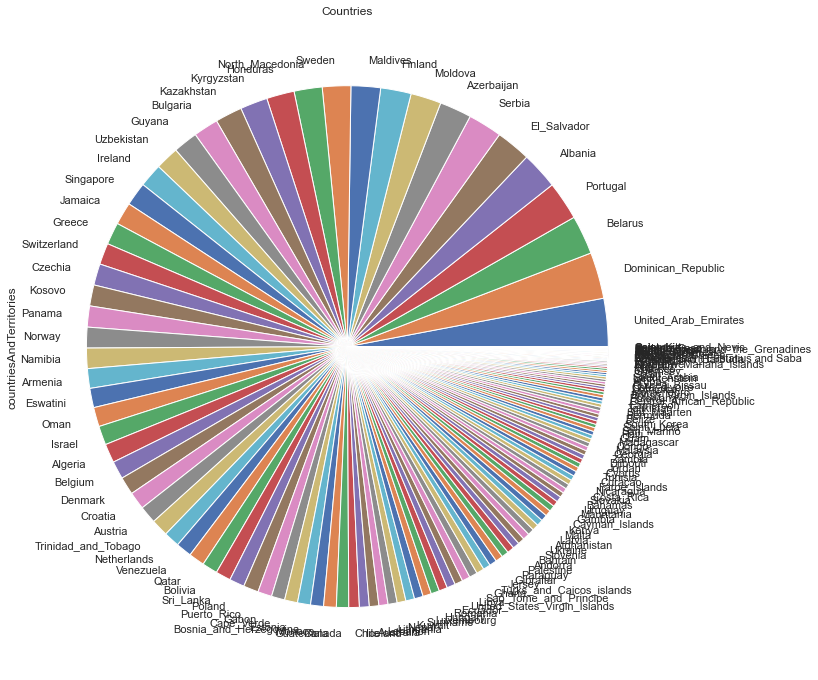

In [113]:
# Pie chart de Dest
plot = Checkcluster['countriesAndTerritories'].value_counts().plot(kind='pie', 
                                            figsize=(12, 12),
                                            title='Countries')

# Check Cluster 2

In [114]:
Cluster2 = df[df['kmeans_cluster']==2]
Checkcluster = Cluster2

In [115]:
Checkcluster

Yearmonth  Yearmonth_LE continentExp  continentExp_LE  \
3        202012             4         Asia                2   
6        202012             4         Asia                2   
10       202012             4         Asia                2   
14       202011             3         Asia                2   
17       202011             3         Asia                2   
...         ...           ...          ...              ...   
61774     20207            10       Africa                0   
61775     20207            10       Africa                0   
61781     20207            10       Africa                0   
61786     20207            10       Africa                0   
61788     20207            10       Africa                0   

      countriesAndTerritories  countriesAndTerritories_LE  cases  deaths  \
3                 Afghanistan                           0     63      10   
6                 Afghanistan                           0    200       6   
10                Afghanistan                           0    119       5   
14                Afghanistan                           0      0       0   
17                Afghanistan                           0      0       0   
...                       ...                         ...    ...     ...   
61774                Zimbabwe                         191     90       2   
61775                Zimbabwe                         191    214       0   
61781                Zimbabwe                         191    273       3   
61786                Zimbabwe                         191     40       5   
61788                Zimbabwe                         191     41       3   

      geoId countryterritoryCode  popData2019  14_days_1000  case/population%  \
3        AF                  AFG  38041757.00          7.13              0.00   
6        AF                  AFG  38041757.00          7.09              0.00   
10       AF                  AFG  38041757.00          7.11              0.00   
14       AF                  AFG  38041757.00          6.42              0.00   
17       AF                  AFG  38041757.00          6.40              0.00   
...     ...                  ...          ...           ...               ...   
61774    ZW                  ZWE  14645473.00          8.18              0.00   
61775    ZW                  ZWE  14645473.00          7.85              0.00   
61781    ZW                  ZWE  14645473.00          5.09              0.00   
61786    ZW                  ZWE  14645473.00          2.83              0.00   
61788    ZW                  ZWE  14645473.00          2.56              0.00   

       deaths/population%  kmeans_cluster  
3                    0.00               2  
6                    0.00               2  
10                   0.00               2  
14                   0.00               2  
17                   0.00               2  
...                   ...             ...  
61774                0.00               2  
61775                0.00               2  
61781                0.00               2  
61786                0.00               2  
61788                0.00               2  

[6304 rows x 15 columns]

In [116]:
Checkcluster.describe()

Yearmonth_LE  continentExp_LE  countriesAndTerritories_LE   cases  \
count       6304.00          6304.00                     6304.00 6304.00   
mean           7.03             1.15                      123.80   70.45   
std            3.32             1.07                       58.89  102.05   
min            0.00             0.00                        0.00 -115.00   
25%            5.00             0.00                       93.00    0.00   
50%            7.00             2.00                      129.00   20.00   
75%           10.00             2.00                      171.00  104.00   
max           12.00             4.00                      191.00  660.00   

       deaths  popData2019  14_days_1000  case/population%  \
count 6304.00      6304.00       6304.00           6304.00   
mean     1.34  36684864.34          3.21              0.00   
std      2.17  12765158.41          5.67              0.00   
min      0.00   8544527.00          0.00              0.00   
25%      0.00  28515829.00          0.05              0.00   
50%      0.00  32981715.00          1.11              0.00   
75%      2.00  44269587.00          4.38              0.00   
max     10.00  67012883.00        115.67              0.00   

       deaths/population%  kmeans_cluster  
count             6304.00         6304.00  
mean                 0.00            2.00  
std                  0.00            0.00  
min                  0.00            2.00  
25%                  0.00            2.00  
50%                  0.00            2.00  
75%                  0.00            2.00  
max                  0.00            2.00

[Text(0, 0, '202012'),
 Text(1, 0, '202011'),
 Text(2, 0, '202010'),
 Text(3, 0, '20209'),
 Text(4, 0, '20208'),
 Text(5, 0, '20207'),
 Text(6, 0, '20206'),
 Text(7, 0, '20205'),
 Text(8, 0, '20204'),
 Text(9, 0, '20203'),
 Text(10, 0, '20202'),
 Text(11, 0, '20201'),
 Text(12, 0, '201912')]

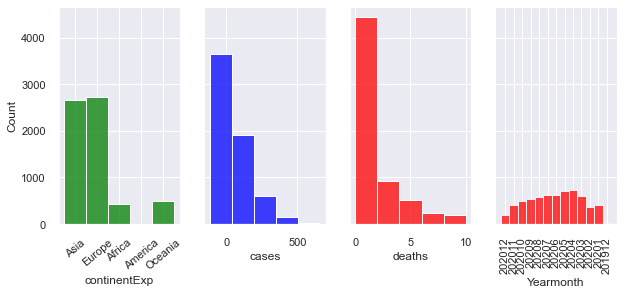

In [117]:
sns.set(style="darkgrid")
xlabels= df.continentExp.unique()
xlabels2= df.Yearmonth.unique()

fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(ncols=4, sharey=True,figsize=(10, 4))
sns.histplot(x='continentExp', data=Checkcluster,bins=5, color='green',ax= ax1)
sns.histplot(x='cases', data=Checkcluster,bins=5, color='blue',ax= ax2)
sns.histplot(x='deaths', data=Checkcluster,bins=5, color='red',ax= ax3)
sns.histplot(x='Yearmonth', data=Checkcluster,bins=5, color='red',ax= ax4)
ax1.set_xticklabels(xlabels, rotation=40)
ax4.set_xticklabels(xlabels2, rotation=90)


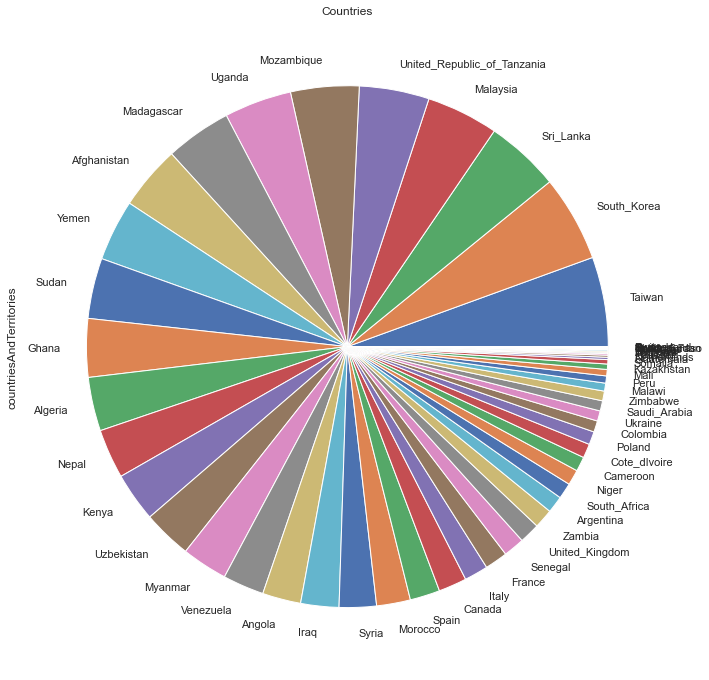

In [118]:
# Pie chart de Dest
plot = Checkcluster['countriesAndTerritories'].value_counts().plot(kind='pie', 
                                            figsize=(12, 12),
                                            title='Countries')

# Check Cluster 3

In [119]:
Cluster3 = df[df['kmeans_cluster']==3]
Checkcluster = Cluster3

In [120]:
Checkcluster

Yearmonth  Yearmonth_LE continentExp  continentExp_LE  \
497       20207            10       Europe                3   
498       20207            10       Europe                3   
502       20207            10       Europe                3   
505       20207            10       Europe                3   
507       20206             9       Europe                3   
...         ...           ...          ...              ...   
60194    202011             3      Oceania                4   
60195    202011             3      Oceania                4   
60196    202011             3      Oceania                4   
60197    202011             3      Oceania                4   
60198    202011             3      Oceania                4   

      countriesAndTerritories  countriesAndTerritories_LE  cases  deaths  \
497                   Albania                           1     82       0   
498                   Albania                           1     68       2   
502                   Albania                           1     67       2   
505                   Albania                           1     45       3   
507                   Albania                           1     64       3   
...                       ...                         ...    ...     ...   
60194                 Vanuatu                         186      0       0   
60195                 Vanuatu                         186      0       0   
60196                 Vanuatu                         186      0       0   
60197                 Vanuatu                         186      0       0   
60198                 Vanuatu                         186      1       0   

      geoId countryterritoryCode  popData2019  14_days_1000  case/population%  \
497      AL                  ALB   2862427.00         34.80              0.00   
498      AL                  ALB   2862427.00         34.66              0.00   
502      AL                  ALB   2862427.00         32.42              0.00   
505      AL                  ALB   2862427.00         29.97              0.00   
507      AL                  ALB   2862427.00         30.60              0.00   
...     ...                  ...          ...           ...               ...   
60194    VU                  VUT    299882.00          0.00              0.00   
60195    VU                  VUT    299882.00          0.00              0.00   
60196    VU                  VUT    299882.00          0.00              0.00   
60197    VU                  VUT    299882.00          0.00              0.00   
60198    VU                  VUT    299882.00          0.00              0.00   

       deaths/population%  kmeans_cluster  
497                  0.00               3  
498                  0.00               3  
502                  0.00               3  
505                  0.00               3  
507                  0.00               3  
...                   ...             ...  
60194                0.00               3  
60195                0.00               3  
60196                0.00               3  
60197                0.00               3  
60198                0.00               3  

[13403 rows x 15 columns]

In [121]:
Checkcluster.describe()

Yearmonth_LE  continentExp_LE  countriesAndTerritories_LE    cases  \
count      13403.00         13403.00                    13403.00 13403.00   
mean           7.16             2.88                       89.90    15.02   
std            3.25             0.65                       47.98    31.94   
min            0.00             2.00                        1.00  -110.00   
25%            5.00             2.00                       57.00     0.00   
50%            8.00             3.00                       91.00     1.00   
75%           10.00             3.00                      127.00    13.00   
max           12.00             4.00                      186.00   300.00   

        deaths  popData2019  14_days_1000  case/population%  \
count 13403.00     13403.00      13403.00          13403.00   
mean      0.26   5019822.43          6.49              0.00   
std       0.85   5476569.32         11.95              0.00   
min      -3.00       815.00         -0.55             -0.00   
25%       0.00    493559.00          0.00              0.00   
50%       0.00   3300998.00          1.36              0.00   
75%       0.00   8519373.00          7.79              0.00   
max       9.00  25203200.00        105.02              0.01   

       deaths/population%  kmeans_cluster  
count            13403.00        13403.00  
mean                 0.00            3.00  
std                  0.00            0.00  
min                  0.00            3.00  
25%                  0.00            3.00  
50%                  0.00            3.00  
75%                  0.00            3.00  
max                  0.00            3.00

[Text(0, 0, '202012'),
 Text(1, 0, '202011'),
 Text(2, 0, '202010'),
 Text(3, 0, '20209'),
 Text(4, 0, '20208'),
 Text(5, 0, '20207'),
 Text(6, 0, '20206'),
 Text(7, 0, '20205'),
 Text(8, 0, '20204'),
 Text(9, 0, '20203'),
 Text(10, 0, '20202'),
 Text(11, 0, '20201'),
 Text(12, 0, '201912')]

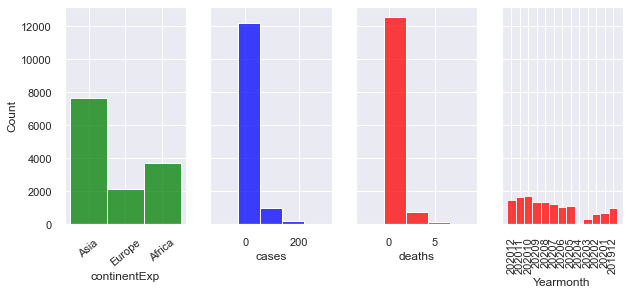

In [122]:
sns.set(style="darkgrid")
xlabels= df.continentExp.unique()
xlabels2= df.Yearmonth.unique()

fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(ncols=4, sharey=True,figsize=(10, 4))
sns.histplot(x='continentExp', data=Checkcluster,bins=5, color='green',ax= ax1)
sns.histplot(x='cases', data=Checkcluster,bins=5, color='blue',ax= ax2)
sns.histplot(x='deaths', data=Checkcluster,bins=5, color='red',ax= ax3)
sns.histplot(x='Yearmonth', data=Checkcluster,bins=5, color='red',ax= ax4)
ax1.set_xticklabels(xlabels, rotation=40)
ax4.set_xticklabels(xlabels2, rotation=90)


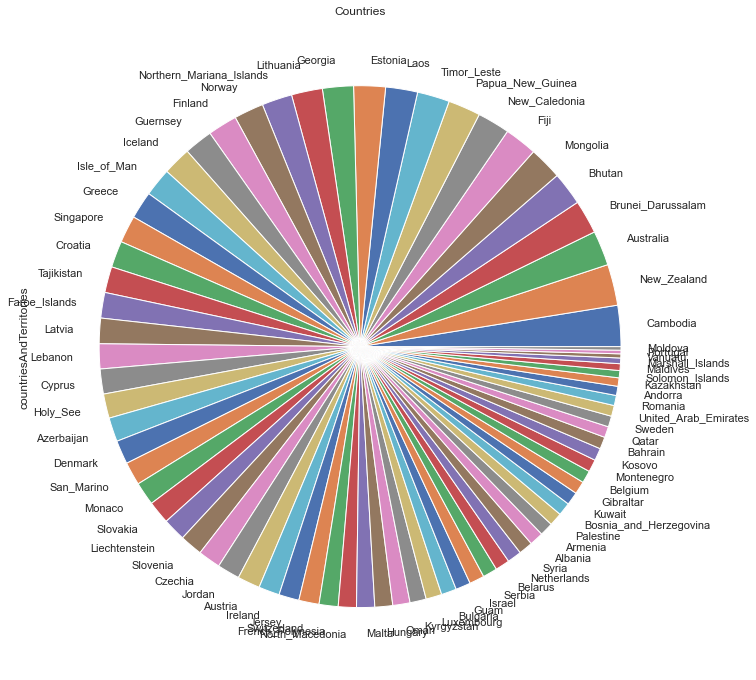

In [123]:
# Pie chart de Dest
plot = Checkcluster['countriesAndTerritories'].value_counts().plot(kind='pie', 
                                            figsize=(12, 12),
                                            title='Countries')

# Regression

array([[<AxesSubplot:title={'center':'14_days_1000'}>,
        <AxesSubplot:title={'center':'Yearmonth_LE'}>,
        <AxesSubplot:title={'center':'case/population%'}>],
       [<AxesSubplot:title={'center':'cases'}>,
        <AxesSubplot:title={'center':'continentExp_LE'}>,
        <AxesSubplot:title={'center':'countriesAndTerritories_LE'}>],
       [<AxesSubplot:title={'center':'deaths'}>,
        <AxesSubplot:title={'center':'deaths/population%'}>,
        <AxesSubplot:title={'center':'kmeans_cluster'}>],
       [<AxesSubplot:title={'center':'popData2019'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

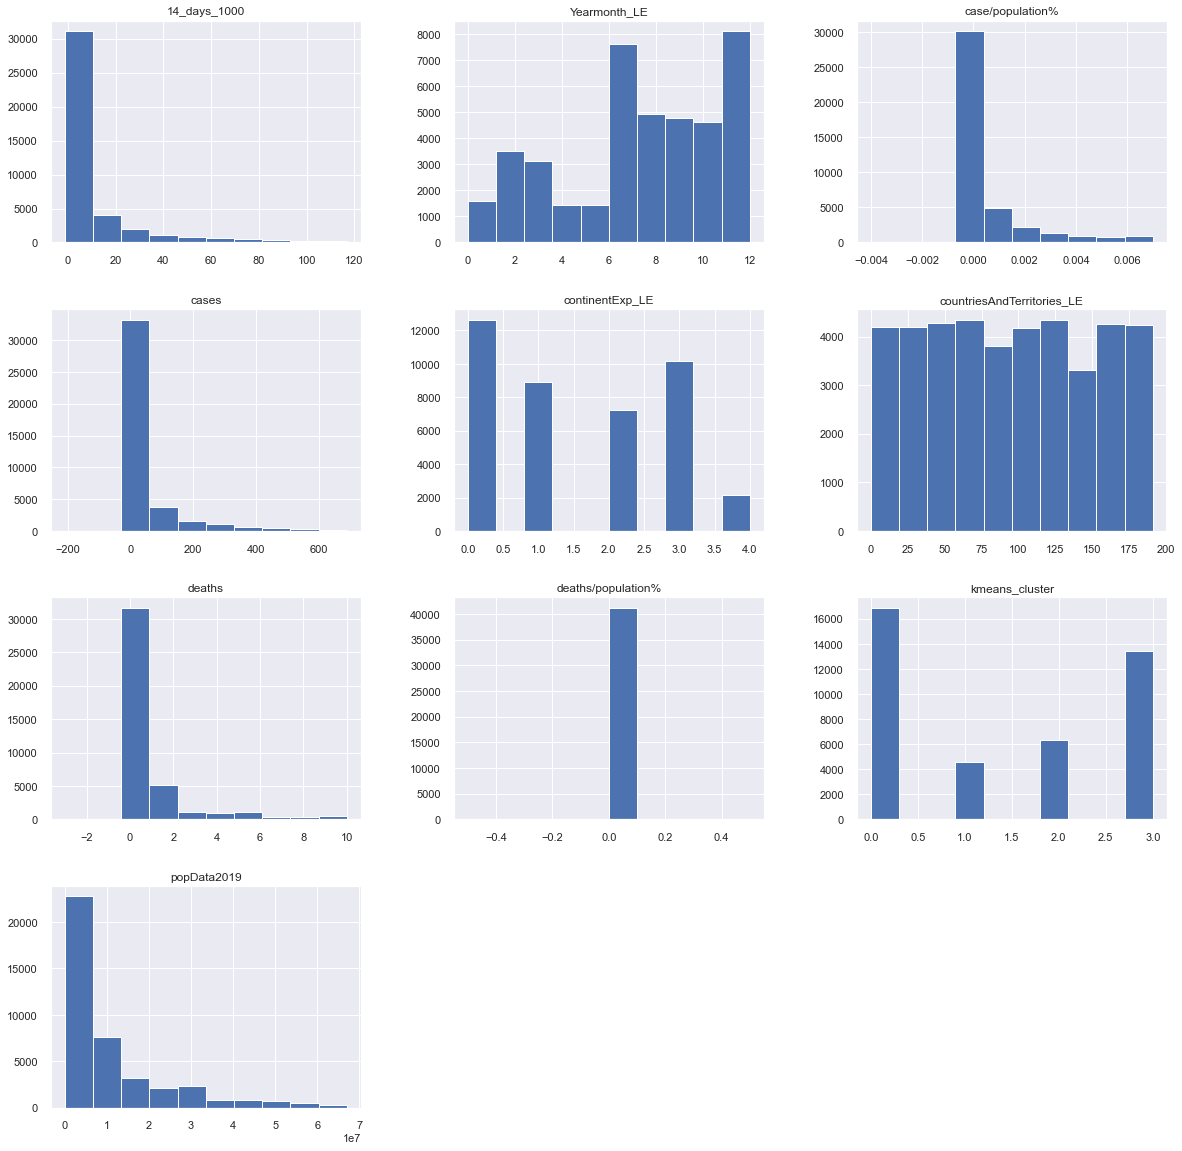

In [124]:
df.hist(figsize=(20,20))

<AxesSubplot:>

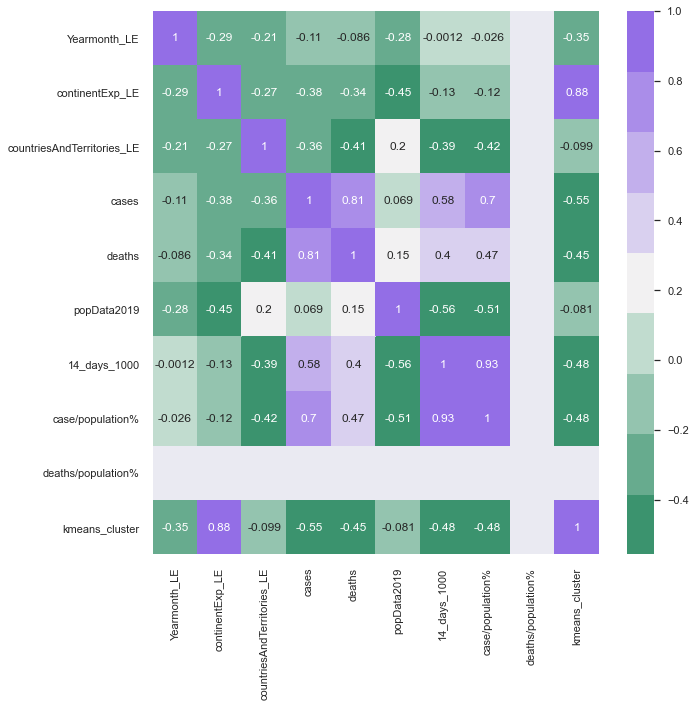

In [125]:
plt.figure(figsize=(10,10))

corr= df.select_dtypes(include=['float64', 'int64']).corr(method='pearson').corr()
sns.heatmap(corr ,annot= True,cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9))

## Distribution Variable respond

Para los modelos de regresión lineal (LM), la distribución tiene que ser de tipo normal.
Para los modelos lineales generalizados (GLM), la distribución tiene que ser de la familia exponencial. (statsmodels)

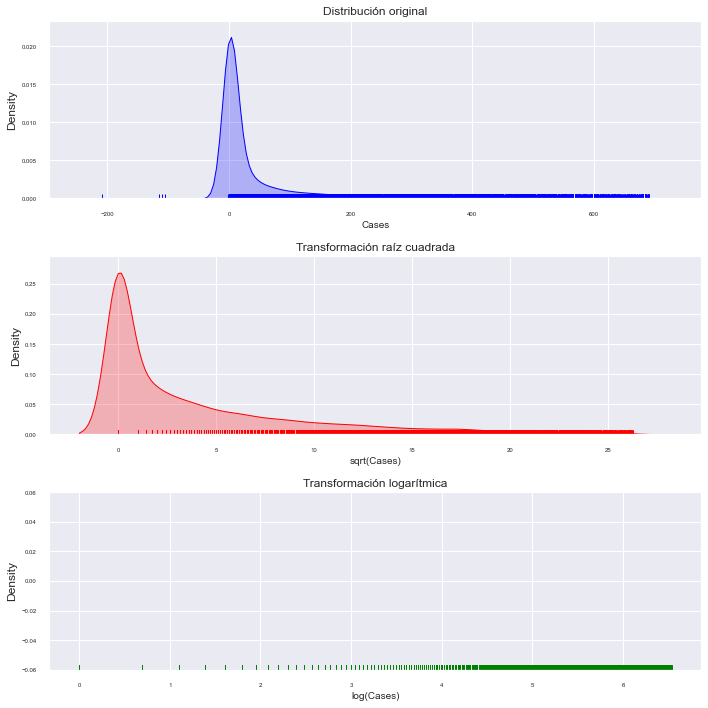

In [126]:
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(10,10))

sns.distplot(
    df.cases,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Cases', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.cases),
    hist    = False,
    rug     = True,
    color   = "red",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Cases)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.cases),
    hist    = False,
    rug     = True,
    color   = "green",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(Cases)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()



In [127]:
df.cases.skew()

3.2528992040123583

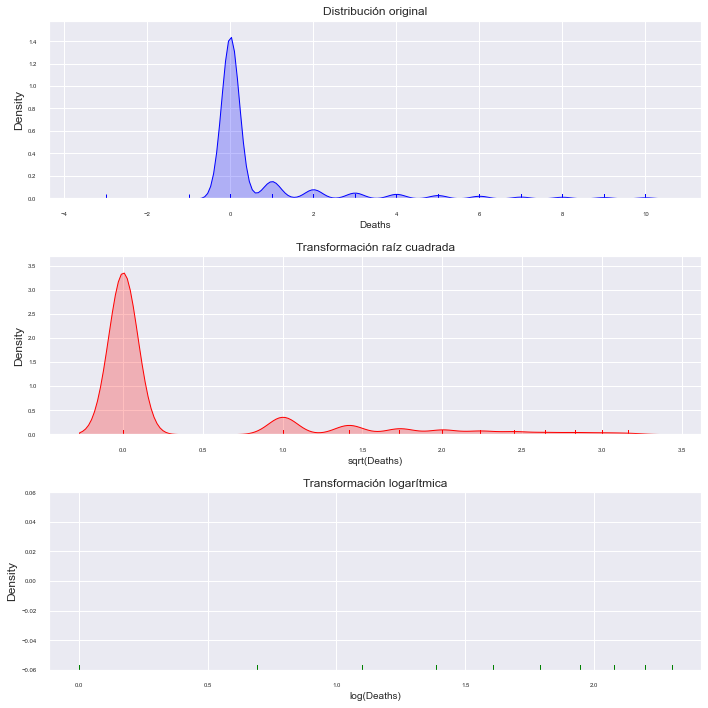

In [128]:
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(10,10))

sns.distplot(
    df.deaths,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Deaths', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.deaths),
    hist    = False,
    rug     = True,
    color   = "red",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Deaths)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.deaths),
    hist    = False,
    rug     = True,
    color   = "green",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(Deaths)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()


In [129]:
df.deaths.skew()

3.0374790905342044

There are some DLL in python, which give you information about the distribution.
Let's see

In [130]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df.cases, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

sumsquare_error     aic        bic  kl_div
cauchy               0.00 2201.40 -739225.18     inf
chi2                 0.00     inf -701226.13    0.35
gamma                0.00     inf -671452.85    0.45
logistic             0.00 2191.35 -667557.74     inf
beta                 0.00 2007.29 -666204.08     inf
norm                 0.00 2078.97 -664841.63     inf
powerlaw             0.00 1373.34 -661888.19     inf
expon                0.00 1464.40 -661857.06     inf
exponpow             0.00     inf -660710.64     nan

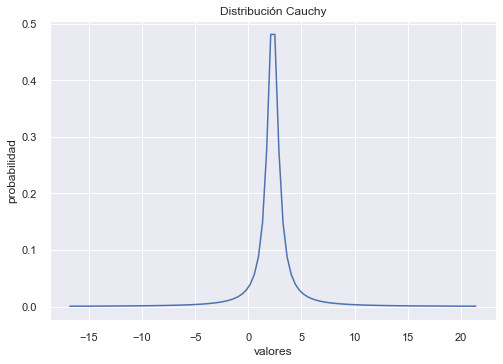

In [131]:
# Graficando Beta
from scipy import stats
a, b = 2.3, 0.6 # parametros de forma.
Cauchy = stats.cauchy(a, b)
x = np.linspace(Cauchy.ppf(0.01),
                Cauchy.ppf(0.99), 100)
fp = Cauchy.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Cauchy')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

In [132]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df.deaths, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

sumsquare_error      aic        bic  kl_div
logistic            32.73  1161.87 -293808.02     inf
beta                33.04  1082.92 -293403.22     inf
chi2                33.08  1046.40 -293359.36     inf
gamma               33.08  1046.40 -293359.36     inf
norm                33.82   991.96 -292465.21     inf
exponpow            34.28   741.52 -291889.35     inf
expon               34.94   615.84 -291122.82     inf
powerlaw            34.95   532.35 -291091.61     inf
cauchy              35.52 10705.28 -290438.89     inf

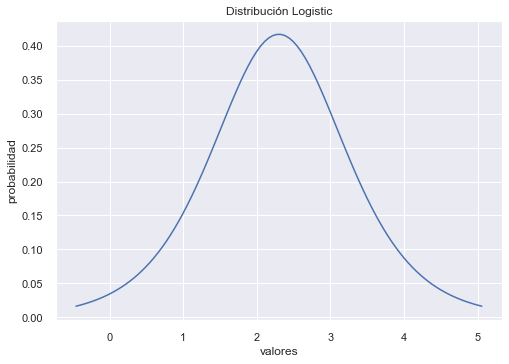

In [133]:
# Graficando Beta
from scipy import stats
a, b = 2.3, 0.6 # parametros de forma.
LG = stats.logistic(a, b)
x = np.linspace(LG.ppf(0.01),
                LG.ppf(0.99), 100)
fp = LG.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Logistic')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# Distribution of all numerical variables

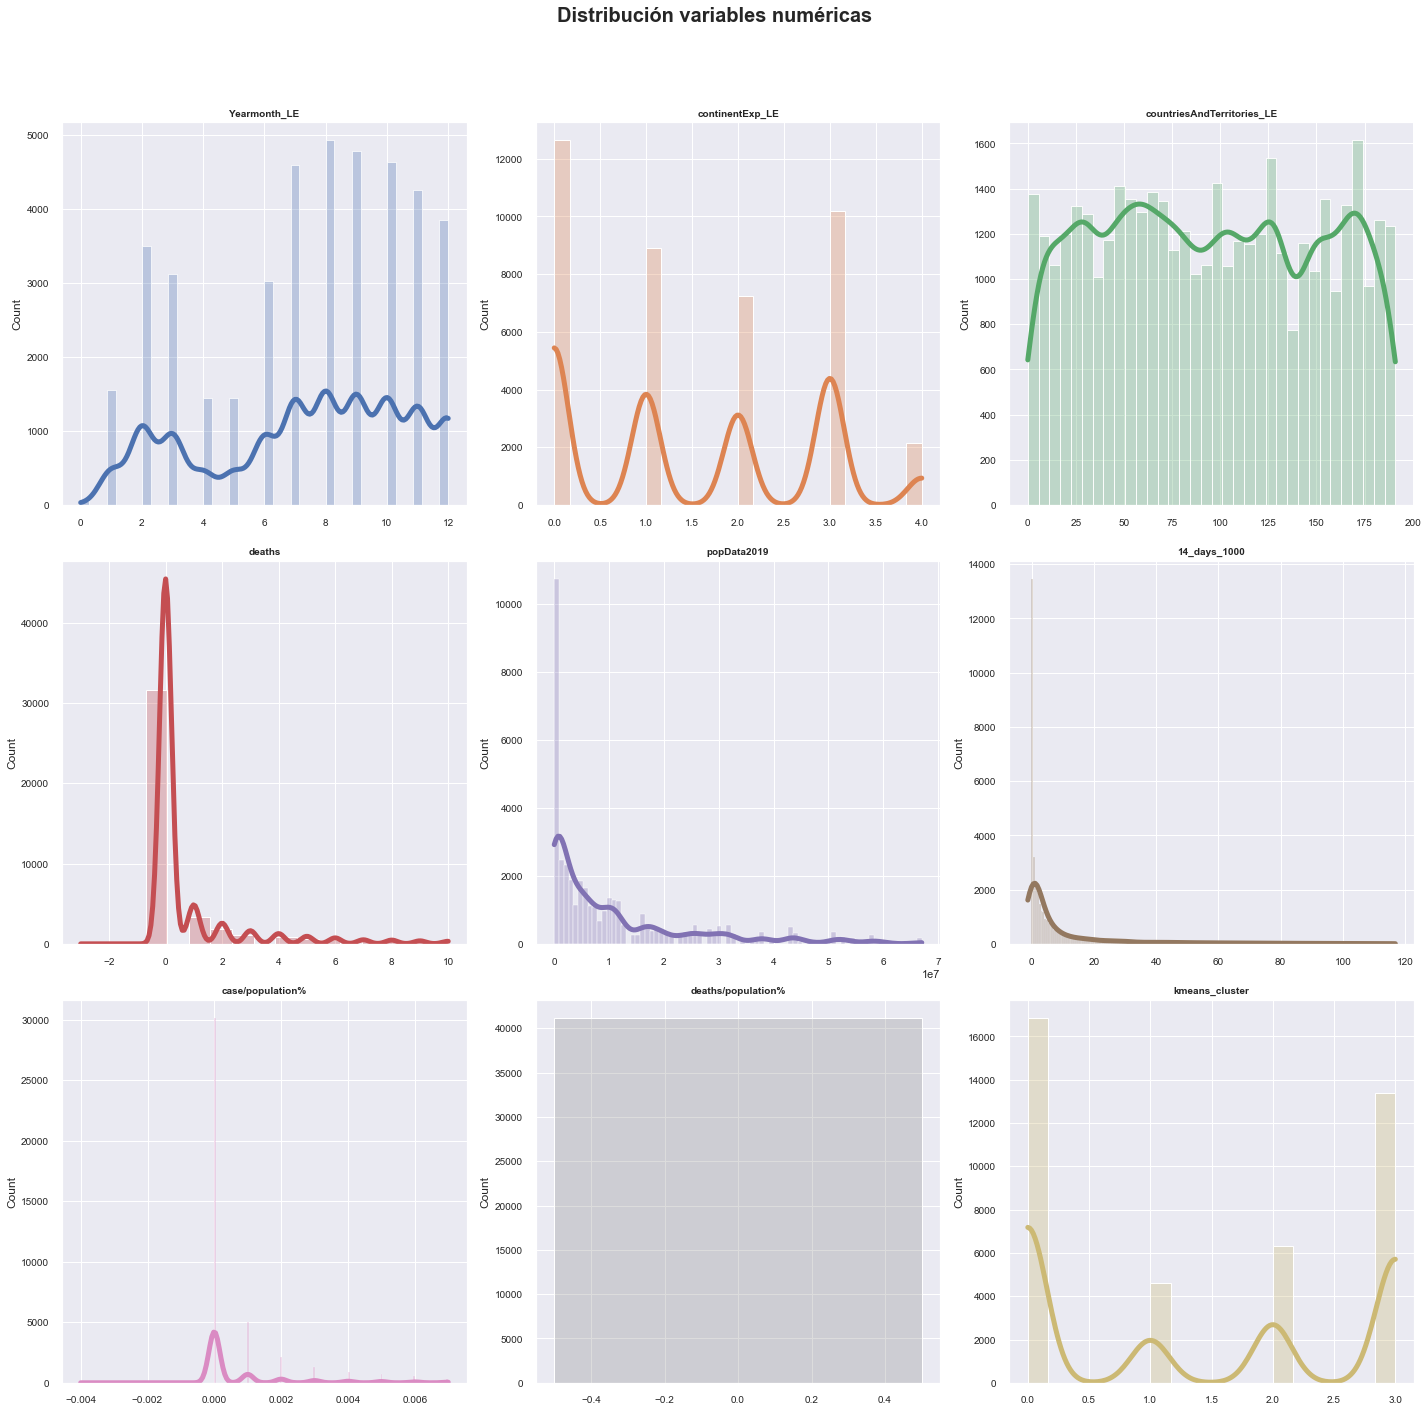

In [134]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('cases')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 5},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 20, fontweight = "bold");

we check now the respond varible with the other aviables

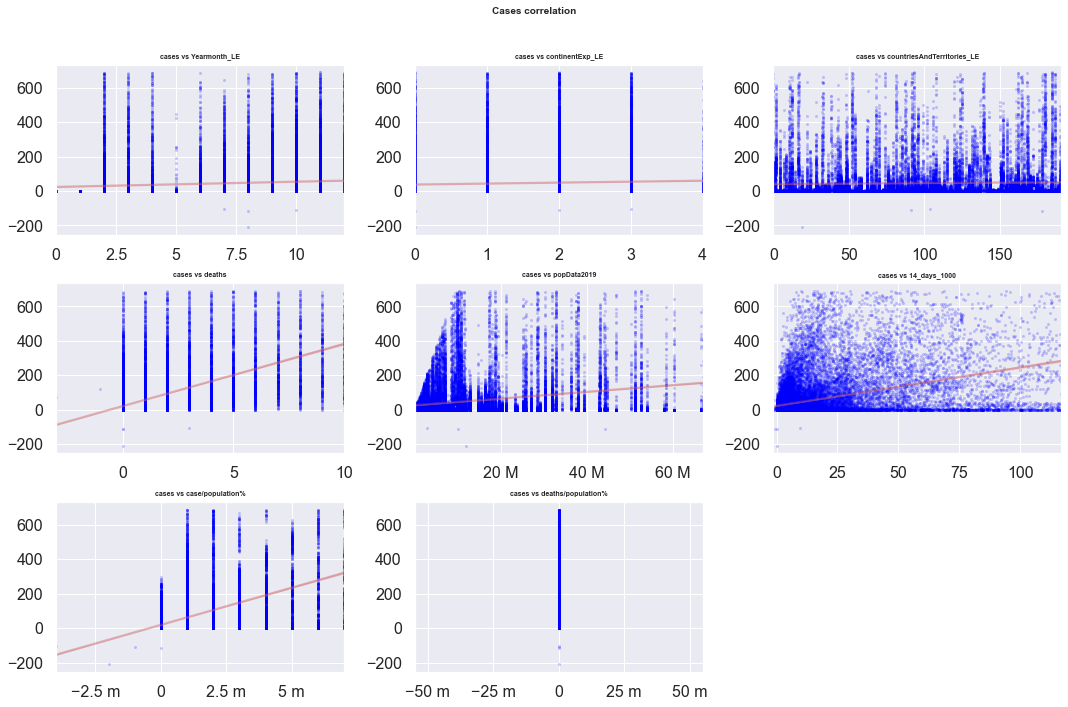

In [135]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('cases')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df.cases,
        color       = "blue",
        marker      = '.',
        scatter_kws = {"alpha":0.2},
        
        line_kws    = {"color":"r","alpha":0.4},
        ax          = axes[i]
    )
    axes[i].set_title(f"cases vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Cases correlation', fontsize = 10, fontweight = "bold");

# Train Test

In [136]:
df_LR = df.select_dtypes(['int64','float64'])
df_LR

Yearmonth_LE  continentExp_LE  countriesAndTerritories_LE  cases  \
1                 4                2                           0    298   
3                 4                2                           0     63   
6                 4                2                           0    200   
8                 4                2                           0    234   
10                4                2                           0    119   
...             ...              ...                         ...    ...   
61895             6                0                         191      0   
61896             6                0                         191      0   
61897             6                0                         191      0   
61898             6                0                         191      1   
61899             6                0                         191      1   

       deaths  popData2019  14_days_1000  case/population%  \
1           9  38041757.00          7.05              0.00   
3          10  38041757.00          7.13              0.00   
6           6  38041757.00          7.09              0.00   
8          10  38041757.00          7.33              0.00   
10          5  38041757.00          7.11              0.00   
...       ...          ...           ...               ...   
61895       0  14645473.00          0.00              0.00   
61896       1  14645473.00          0.00              0.00   
61897       0  14645473.00          0.00              0.00   
61898       0  14645473.00          0.00              0.00   
61899       0  14645473.00          0.00              0.00   

       deaths/population%  kmeans_cluster  
1                    0.00               1  
3                    0.00               2  
6                    0.00               2  
8                    0.00               1  
10                   0.00               2  
...                   ...             ...  
61895                0.00               0  
61896                0.00               0  
61897                0.00               0  
61898                0.00               0  
61899                0.00               0  

[41169 rows x 10 columns]

In [137]:
X = df_LR.drop('cases', axis=1)
y = df_LR.cases

In [138]:
X

Yearmonth_LE  continentExp_LE  countriesAndTerritories_LE  deaths  \
1                 4                2                           0       9   
3                 4                2                           0      10   
6                 4                2                           0       6   
8                 4                2                           0      10   
10                4                2                           0       5   
...             ...              ...                         ...     ...   
61895             6                0                         191       0   
61896             6                0                         191       1   
61897             6                0                         191       0   
61898             6                0                         191       0   
61899             6                0                         191       0   

       popData2019  14_days_1000  case/population%  deaths/population%  \
1      38041757.00          7.05              0.00                0.00   
3      38041757.00          7.13              0.00                0.00   
6      38041757.00          7.09              0.00                0.00   
8      38041757.00          7.33              0.00                0.00   
10     38041757.00          7.11              0.00                0.00   
...            ...           ...               ...                 ...   
61895  14645473.00          0.00              0.00                0.00   
61896  14645473.00          0.00              0.00                0.00   
61897  14645473.00          0.00              0.00                0.00   
61898  14645473.00          0.00              0.00                0.00   
61899  14645473.00          0.00              0.00                0.00   

       kmeans_cluster  
1                   1  
3                   2  
6                   2  
8                   1  
10                  2  
...               ...  
61895               0  
61896               0  
61897               0  
61898               0  
61899               0  

[41169 rows x 9 columns]

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [140]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((32935, 9), (8234, 9), (32935,), (8234,))

In [141]:
print(">>>Train partition")
print("-----------------------")
print(X_train.describe())

>>>Train partition
-----------------------
       Yearmonth_LE  continentExp_LE  countriesAndTerritories_LE   deaths  \
count      32935.00         32935.00                    32935.00 32935.00   
mean           7.37             1.52                       94.73     0.73   
std            3.27             1.29                       55.44     1.78   
min            0.00             0.00                        0.00    -1.00   
25%            5.00             0.00                       48.00     0.00   
50%            8.00             1.00                       94.00     0.00   
75%           10.00             3.00                      144.00     0.00   
max           12.00             4.00                      191.00    10.00   

       popData2019  14_days_1000  case/population%  deaths/population%  \
count     32935.00      32935.00          32935.00            32935.00   
mean   10797091.89         10.74              0.00                0.00   
std    13850698.35         20.06         

In [142]:
print(">>>Train partition")
print("-----------------------")
print(X_test.describe())

>>>Train partition
-----------------------
       Yearmonth_LE  continentExp_LE  countriesAndTerritories_LE  deaths  \
count       8234.00          8234.00                     8234.00 8234.00   
mean           7.32             1.51                       94.79    0.71   
std            3.30             1.29                       55.65    1.75   
min            0.00             0.00                        0.00   -3.00   
25%            5.00             0.00                       47.00    0.00   
50%            8.00             1.00                       94.00    0.00   
75%           10.00             3.00                      145.00    0.00   
max           12.00             4.00                      191.00   10.00   

       popData2019  14_days_1000  case/population%  deaths/population%  \
count      8234.00       8234.00           8234.00             8234.00   
mean   10856565.44         10.64              0.00                0.00   
std    13752750.14         19.99              0.00

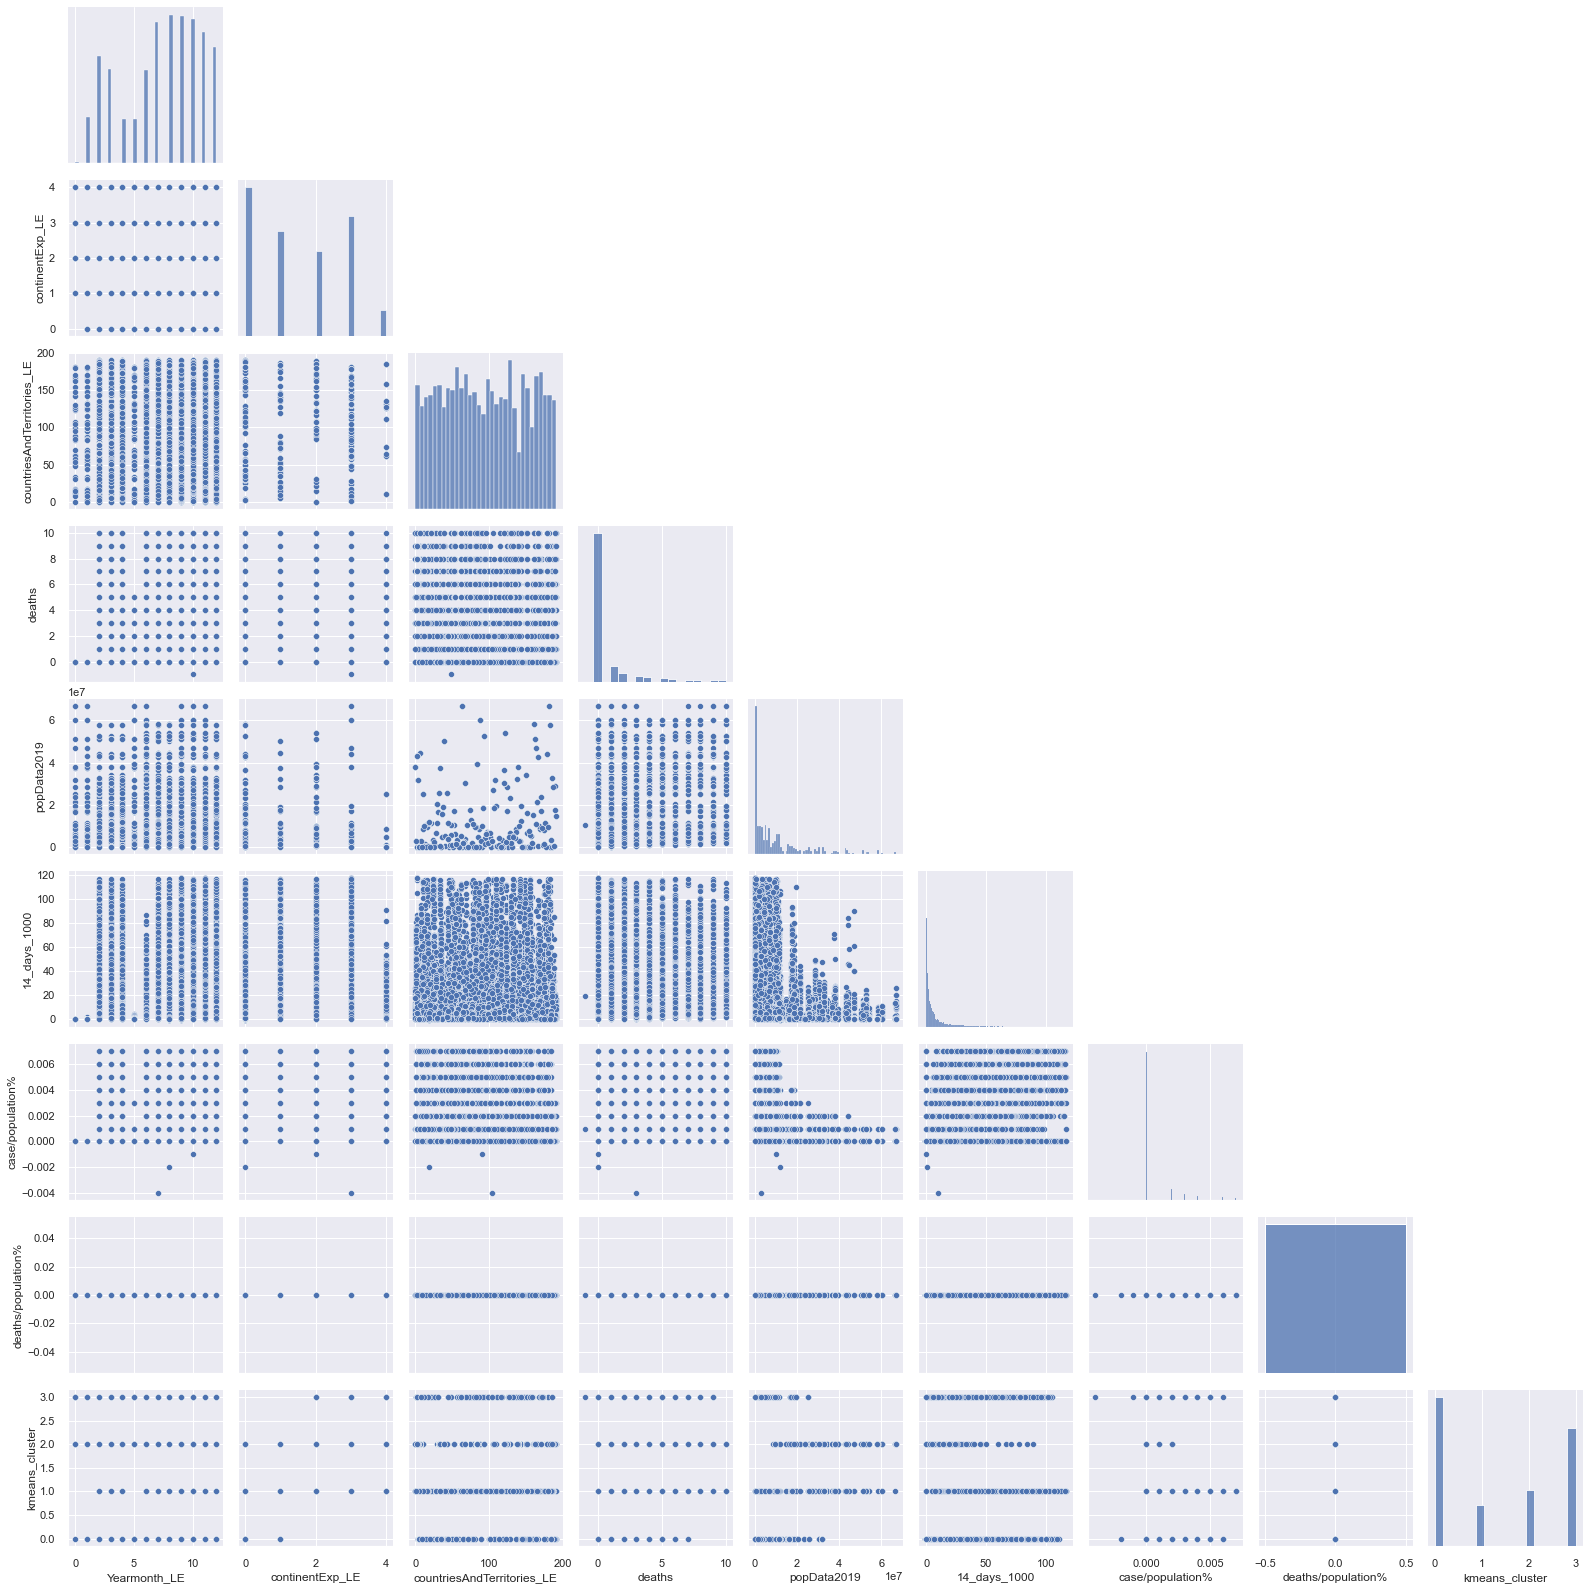

In [143]:
sns.pairplot(X_train[['Yearmonth_LE', 'continentExp_LE', 'countriesAndTerritories_LE', 'deaths', 'popData2019', '14_days_1000', 'case/population%',
       'deaths/population%', 'kmeans_cluster']].round(3), corner=True)

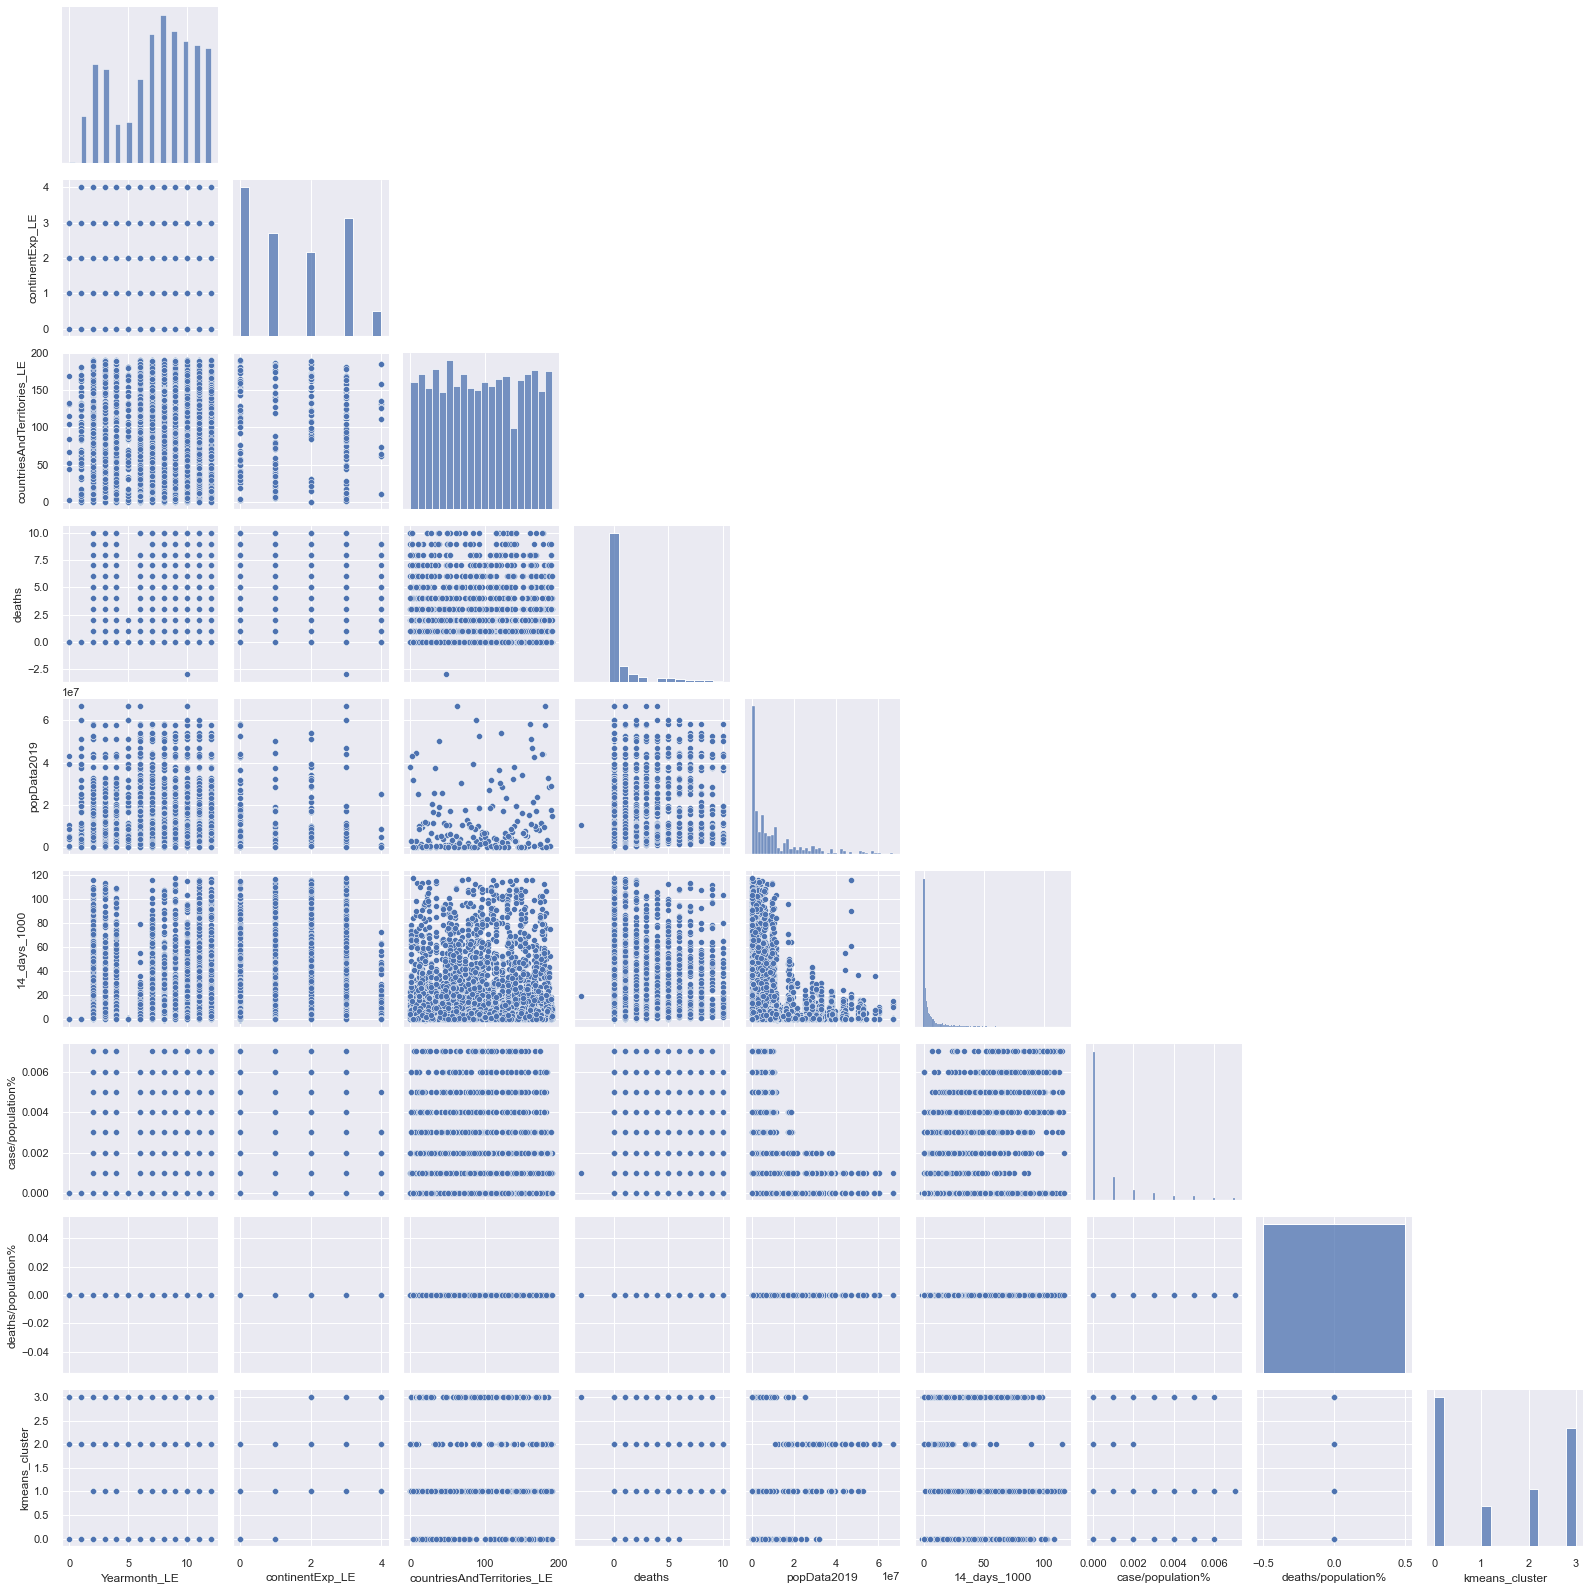

In [144]:
sns.pairplot(X_test[['Yearmonth_LE', 'continentExp_LE', 'countriesAndTerritories_LE', 'deaths', 'popData2019', '14_days_1000', 'case/population%',
       'deaths/population%', 'kmeans_cluster']].round(3), corner=True)

# Standar Scaler

In [145]:
scaler = StandardScaler()

In [146]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [147]:
X_train.shape,X_test.shape

((32935, 9), (8234, 9))

# Automate fit and evaluate all the models with LazyRegressor

due to the duration of the process,almost 1 hour, we have saved a copy of the result of LazyRegressor as df_models

In [149]:
df_models = pd.read_csv('D:\\IT_Academics\\Data_Science\\0_Tutoriales_books\\Anton_summary_python\\Proyecto\\project covid\\Regressionmodels.csv')

In [151]:
df_models.head(5)

Model  Adjusted R-Squared  R-Squared  RMSE  \
0          RandomForestRegressor                0.97       0.97 19.66   
1  HistGradientBoostingRegressor                0.96       0.96 19.89   
2            ExtraTreesRegressor                0.96       0.96 20.07   
3               BaggingRegressor                0.96       0.96 20.20   
4                  LGBMRegressor                0.96       0.96 20.32   

   Time Taken  
0       16.55  
1        2.45  
2        6.29  
3        0.97  
4        0.68

We can observe that the best algorithm is RandomForestRegressor, but it takes alomosy 17 min. The second one is HistGradientBoostingRegressor, which it last only 2,45 minutes.. Therefore we will apply the second one.

## Apply HistGradientBoostingRegressor

In [153]:
est = HistGradientBoostingRegressor().fit(X_train,y_train)

In [155]:
est.score(X_train,y_train)

0.9741980070754881

In [158]:
y_pred = est.predict(X_test)


#### Metrics Lineal Regression

In [167]:
print('The mean absolute error: ',mean_absolute_error(y_test, y_pred))
print('mean_squared error: ',mean_squared_error(y_test,y_pred))
print ('R2 Score: ',r2_score(y_test,y_pred))

The mean absolute error:  8.952245738766996
mean_squared error:  372.9018155908451
R2 Score:  0.9625262166769936


### Corss Validation

In [174]:
kf = KFold(n_splits=5)
score =est.score(X_train,y_train)
scores = cross_val_score(est, X_train, y_train, cv=kf)
print("Metricas cross_validation", scores)
print("Metrica del modelo", score)
print("Media de cross_validation", scores.mean())


Metricas cross_validation [0.96673577 0.96470982 0.96528646 0.96491038 0.9664784 ]
Metrica del modelo 0.9741980070754881
Media de cross_validation 0.9656241670306172


In [176]:
df_lr=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_lr.round(3)

Actual  Predicted
26056     191     203.87
51601       0      21.55
31690     134     125.23
18855       4       1.00
20130      14       9.68
...       ...        ...
16403       0      -0.10
19412       0      -0.10
12763       6       6.97
10873      14      12.44
46760     189     205.96

[8234 rows x 2 columns]